### Load libraries

In [1]:
library(tidyverse)
library(stringr)
library(microViz)
library(metagMisc)
library(phylosignal)
library(ggplot2)
library(ggsci)
library(viridis)
library(conflicted)
library(gridExtra)
library(vegan)
library(ape)
library(lattice)
library(permute)
library(grid) 
library(knitr)
library(phyloseq)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.0.9     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.4.1
✔ ggplot2   3.3.6     ✔ tibble    3.2.1
✔ lubridate 1.8.0     ✔ tidyr     1.2.1
✔ purrr     0.3.5     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

microViz version 0.9.6 - Copyright (C) 2022 David Barnett
* Website: https://david-barnett.github.io/microViz/
* Useful? For citation info, run: citation('microViz')
* Silence: suppressPackageStartupMessages(library(microViz))



Attaching package: ‘metagMisc’


The following object is masked

In [2]:
library(cowplot)

In [3]:
#Import functions for plots
source("../FlagellinDiversity/plots_functions.r")

```{r, echo=FALSE, results='hide'}
opts_chunk$set(cache=FALSE,warning=FALSE)
```

### Setup for plot labels

### Setup labels

In [4]:
#Setup for label sizes in plots
labels.x=theme(axis.title.x = element_text(size=18),
               axis.text.x = element_text(size=18,vjust=1,hjust=1,angle=45))

labels.x.pca=theme(axis.title.x = element_text(size=18),
               axis.text.x = element_text(size=18)) 

labels.y=theme(axis.title.y = element_text(size=18),
               axis.text.y= element_text(size=18))

labels.legend=theme(legend.text = element_text (size=18),
                    legend.title = element_text(size=18))

### Declare conflict preferences

In [5]:
conflict_prefer("filter","dplyr")
conflict_prefer("rename","dplyr")
conflict_prefer("mutate","dplyr")
conflict_prefer("count","dplyr")

[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::rename over any other package.
[conflicted] Will prefer dplyr::mutate over any other package.
[conflicted] Will prefer dplyr::count over any other package.


## Phyloseq analyses

In [6]:
nonrare.psAll.filt = readRDS("filter_taxa_All_count_subsampled.opt3.rds")

In [7]:
nonrare.psAll.filt

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1881 taxa and 85 samples ]
sample_data() Sample Data:       [ 85 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 1881 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1881 tips and 1880 internal nodes ]

In [8]:
subset.host=subset_samples(nonrare.psAll.filt,biome_1=="Host-associated")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



In [9]:
subset.host

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1881 taxa and 63 samples ]
sample_data() Sample Data:       [ 63 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 1881 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1881 tips and 1880 internal nodes ]

### Richness plots

In [10]:
values.plot=c("#e64b35b2","#4dbbd5b2","#00a087b2","#3c5488b2","#f39b7fb2","#8491b4b2")#,"#91d1c2b2","#dc0000b2","#7e6148b2")
breaks.plot=c("Actinopterygii","Amphibia","Aves","Mammalia","Plants","Reptilia")

In [11]:
richness.estimates.host=mutate(as_tibble(subset.host@sam_data),estimate_richness(subset.host, split = TRUE, measures = c("Observed","Chao1","Shannon","Simpson")))

In [12]:
head(richness.estimates.host)

Sample     Dataset      biome_0 biome_1         biome_2       
1 ERS1579929 MGYS00001583 root    Host-associated Actinopterygii
2 ERS1579944 MGYS00001583 root    Host-associated Actinopterygii
3 ERS1579948 MGYS00001583 root    Host-associated Actinopterygii
4 ERS2085340 MGYS00003488 root    Host-associated Aves          
5 ERS2867119 MGYS00003472 root    Host-associated Aves          
6 ERS723595  MGYS00001796 root    Host-associated Mammalia      
  biome_3          biome_4         family      category mammals  Observed
1 Digestive system Foregut         Salmonidae  Animal   Others    13     
2 Digestive system Foregut         Salmonidae  Animal   Others    13     
3 Digestive system Foregut         Salmonidae  Animal   Others    12     
4 Digestive system Fecal           Phasianidae Animal   Others   242     
5 Digestive system Fecal           Anatidae    Animal   Others    66     
6 Digestive system Large intestine Felidae     Animal   Mammalia  70     
  Chao1    se.chao1  Shannon  Simpson  
1  13.7500  1.415744 2.379392 0.8925000
2  14.5000  2.220715 2.399997 0.8979592
3  15.0000  3.406464 2.115583 0.8203018
4 405.5000 43.306462 3.906503 0.9520625
5 177.3636 46.345919 3.154978 0.8627531
6 144.5455 33.001127 2.541424 0.7692611

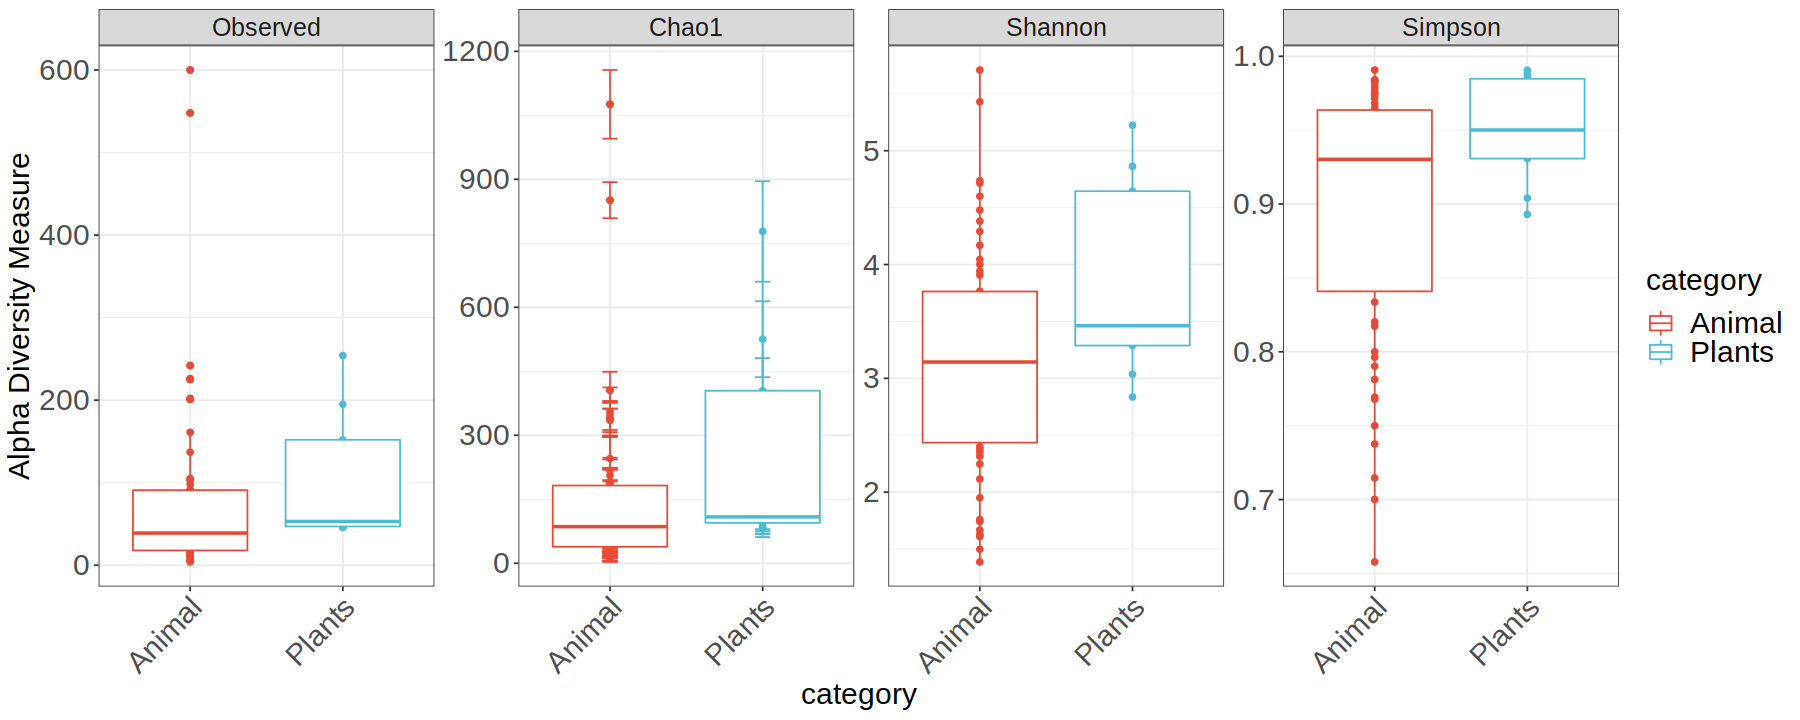

In [13]:
options(repr.plot.width=15,repr.plot.height=6)
plot_richness(subset.host,x="category",measures=c("Observed","Chao1","Shannon","Simpson"),color="category")+
geom_boxplot()+
theme_bw()+
scale_color_npg()+
labels.x+labels.y+labels.legend+
theme(strip.text=element_text(size=15))

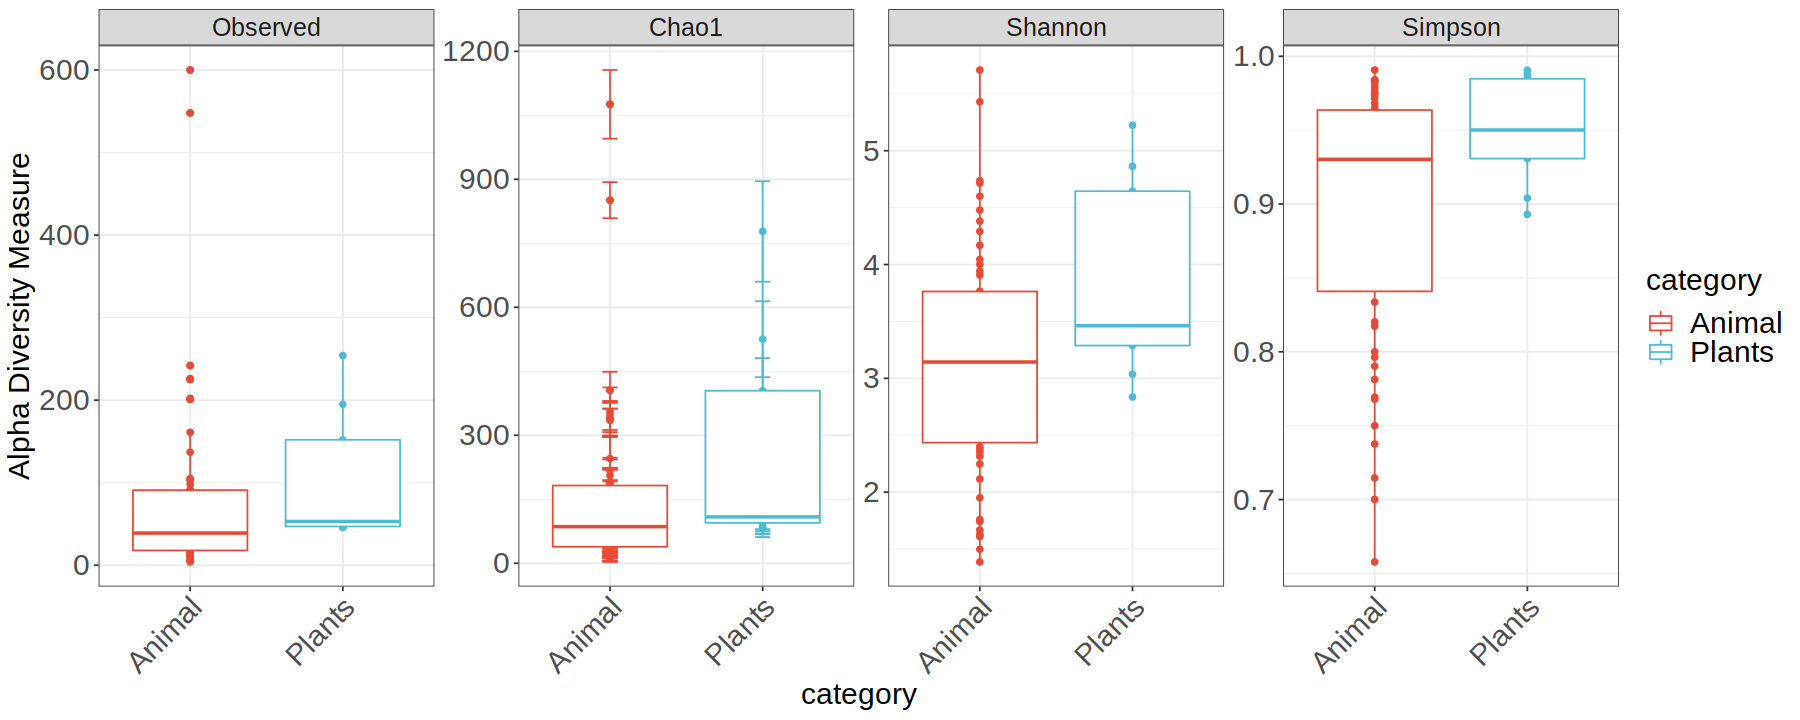

In [14]:
options(repr.plot.width=15,repr.plot.height=6)
plot_richness(subset.host,x="category",measures=c("Observed","Chao1","Shannon","Simpson"),color="category")+
geom_boxplot()+
theme_bw()+
scale_color_npg()+
labels.x+labels.y+labels.legend+
theme(strip.text=element_text(size=15))

### Statistics on richness estimates

#### I. Kruskal tests by category

In [15]:
kruskal.test(Observed~category,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Observed by category
Kruskal-Wallis chi-squared = 3.1961, df = 1, p-value = 0.07382


In [16]:
kruskal.test(Chao1~category,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Chao1 by category
Kruskal-Wallis chi-squared = 3.337, df = 1, p-value = 0.06774


In [17]:
kruskal.test(Shannon~category,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Shannon by category
Kruskal-Wallis chi-squared = 2.7222, df = 1, p-value = 0.09896


In [18]:
kruskal.test(Simpson~category,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Simpson by category
Kruskal-Wallis chi-squared = 2.6578, df = 1, p-value = 0.103


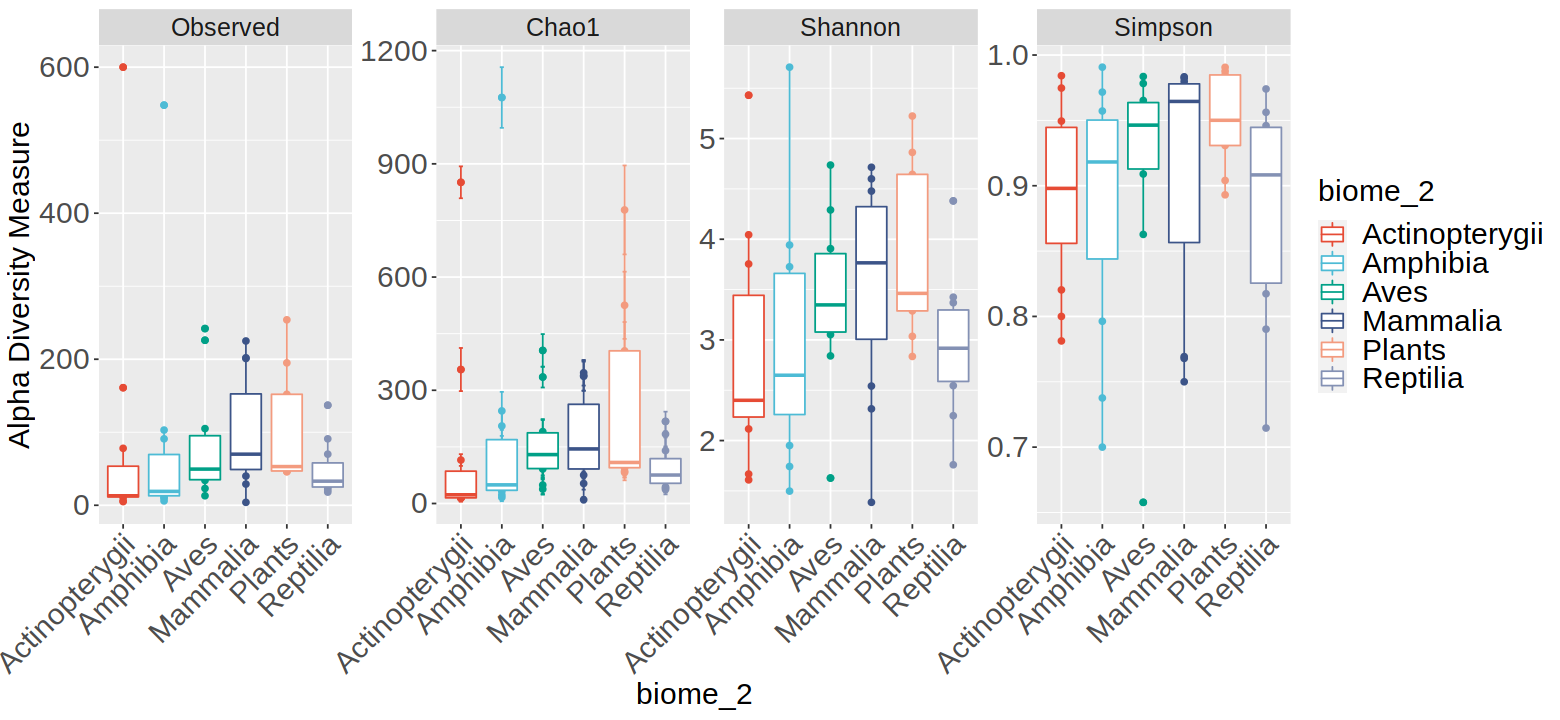

In [19]:
options(repr.plot.width=13,repr.plot.height=6)
plot_richness(subset.host,x="biome_2",measures=c("Observed","Chao1","Shannon","Simpson"),color="biome_2")+
geom_boxplot()+
scale_color_npg()+#scale_color_manual(values=values.plot,breaks=breaks.plot)+
labels.x+labels.y+labels.legend+
theme(strip.text=element_text(size=15))

#### II. Kruskal test by biome_2

In [20]:
dplyr::count(richness.estimates.host,biome_2)

biome_2        n 
1 Actinopterygii 11
2 Amphibia       11
3 Aves           10
4 Mammalia       11
5 Plants          9
6 Reptilia       11

In [21]:
kruskal.test(Observed~biome_2,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Observed by biome_2
Kruskal-Wallis chi-squared = 10.812, df = 5, p-value = 0.05523


In [22]:
kruskal.test(Chao1~biome_2,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Chao1 by biome_2
Kruskal-Wallis chi-squared = 11.197, df = 5, p-value = 0.0476


In [23]:
kruskal.test(Shannon~biome_2,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Shannon by biome_2
Kruskal-Wallis chi-squared = 8.4232, df = 5, p-value = 0.1344


In [24]:
kruskal.test(Simpson~biome_2,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Simpson by biome_2
Kruskal-Wallis chi-squared = 6.714, df = 5, p-value = 0.2428


#### II. Wilcoxon test by biome_2

In [25]:
pairwise.wilcox.test(richness.estimates.host$Observed, 
                     richness.estimates.host$biome_2, 
                     p.adjust.method="fdr")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
W


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates.host$Observed and richness.estimates.host$biome_2 

         Actinopterygii Amphibia Aves Mammalia Plants
Amphibia 0.64           -        -    -        -     
Aves     0.20           0.37     -    -        -     
Mammalia 0.20           0.23     0.64 -        -     
Plants   0.20           0.20     0.47 0.76     -     
Reptilia 0.23           0.47     0.46 0.20     0.20  

P value adjustment method: fdr 

In [26]:
pairwise.wilcox.test(richness.estimates.host$Chao1, 
                     richness.estimates.host$biome_2, 
                     p.adjust.method="fdr")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates.host$Chao1 and richness.estimates.host$biome_2 

         Actinopterygii Amphibia Aves Mammalia Plants
Amphibia 0.26           -        -    -        -     
Aves     0.19           0.28     -    -        -     
Mammalia 0.25           0.26     0.81 -        -     
Plants   0.19           0.24     0.77 0.76     -     
Reptilia 0.24           0.70     0.26 0.25     0.19  

P value adjustment method: fdr 

In [27]:
pairwise.wilcox.test(richness.estimates.host$Shannon, 
                     richness.estimates.host$biome_2, 
                     p.adjust.method="fdr")


	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  richness.estimates.host$Shannon and richness.estimates.host$biome_2 

         Actinopterygii Amphibia Aves Mammalia Plants
Amphibia 0.70           -        -    -        -     
Aves     0.38           0.58     -    -        -     
Mammalia 0.38           0.45     0.70 -        -     
Plants   0.35           0.38     0.70 1.00     -     
Reptilia 0.60           1.00     0.38 0.38     0.30  

P value adjustment method: fdr 

In [28]:
pairwise.wilcox.test(richness.estimates.host$Simpson, 
                     richness.estimates.host$biome_2, 
                     p.adjust.method="fdr")


	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  richness.estimates.host$Simpson and richness.estimates.host$biome_2 

         Actinopterygii Amphibia Aves Mammalia Plants
Amphibia 0.90           -        -    -        -     
Aves     0.54           0.71     -    -        -     
Mammalia 0.68           0.49     0.75 -        -     
Plants   0.49           0.49     0.75 0.90     -     
Reptilia 0.90           0.90     0.49 0.49     0.49  

P value adjustment method: fdr 

### Beta diversity

### 1. Ordination

In [29]:
#Distance matrices for anosim
jaccard.dist = distance(subset.host,method="jaccard",type="samples")
unifrac.dist = distance(subset.host,method="unifrac",type="samples")
bray.dist = distance(subset.host,method="bray",type="samples")
wunifrac.dist = distance(subset.host,method="wunifrac",type="samples")

In [30]:
jaccard.host = ordinate(subset.host,distance="jaccard",method="PCoA")
unifrac.host = ordinate(subset.host,distance="unifrac",method="PCoA")
bray.host = ordinate(subset.host,distance="bray",method="PCoA")
wunifrac.host = ordinate(subset.host,distance="wunifrac",method="PCoA")

### 2. Plots

#### By category

In [31]:
jaccard.plot = plot_color_discrete(subset.host,jaccard.host,"category")
bray.plot = plot_color_discrete(subset.host,bray.host,"category")
unifrac.plot = plot_color_discrete(subset.host,unifrac.host,"category")
wunifrac.plot = plot_color_discrete(subset.host,wunifrac.host,"category")


Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"


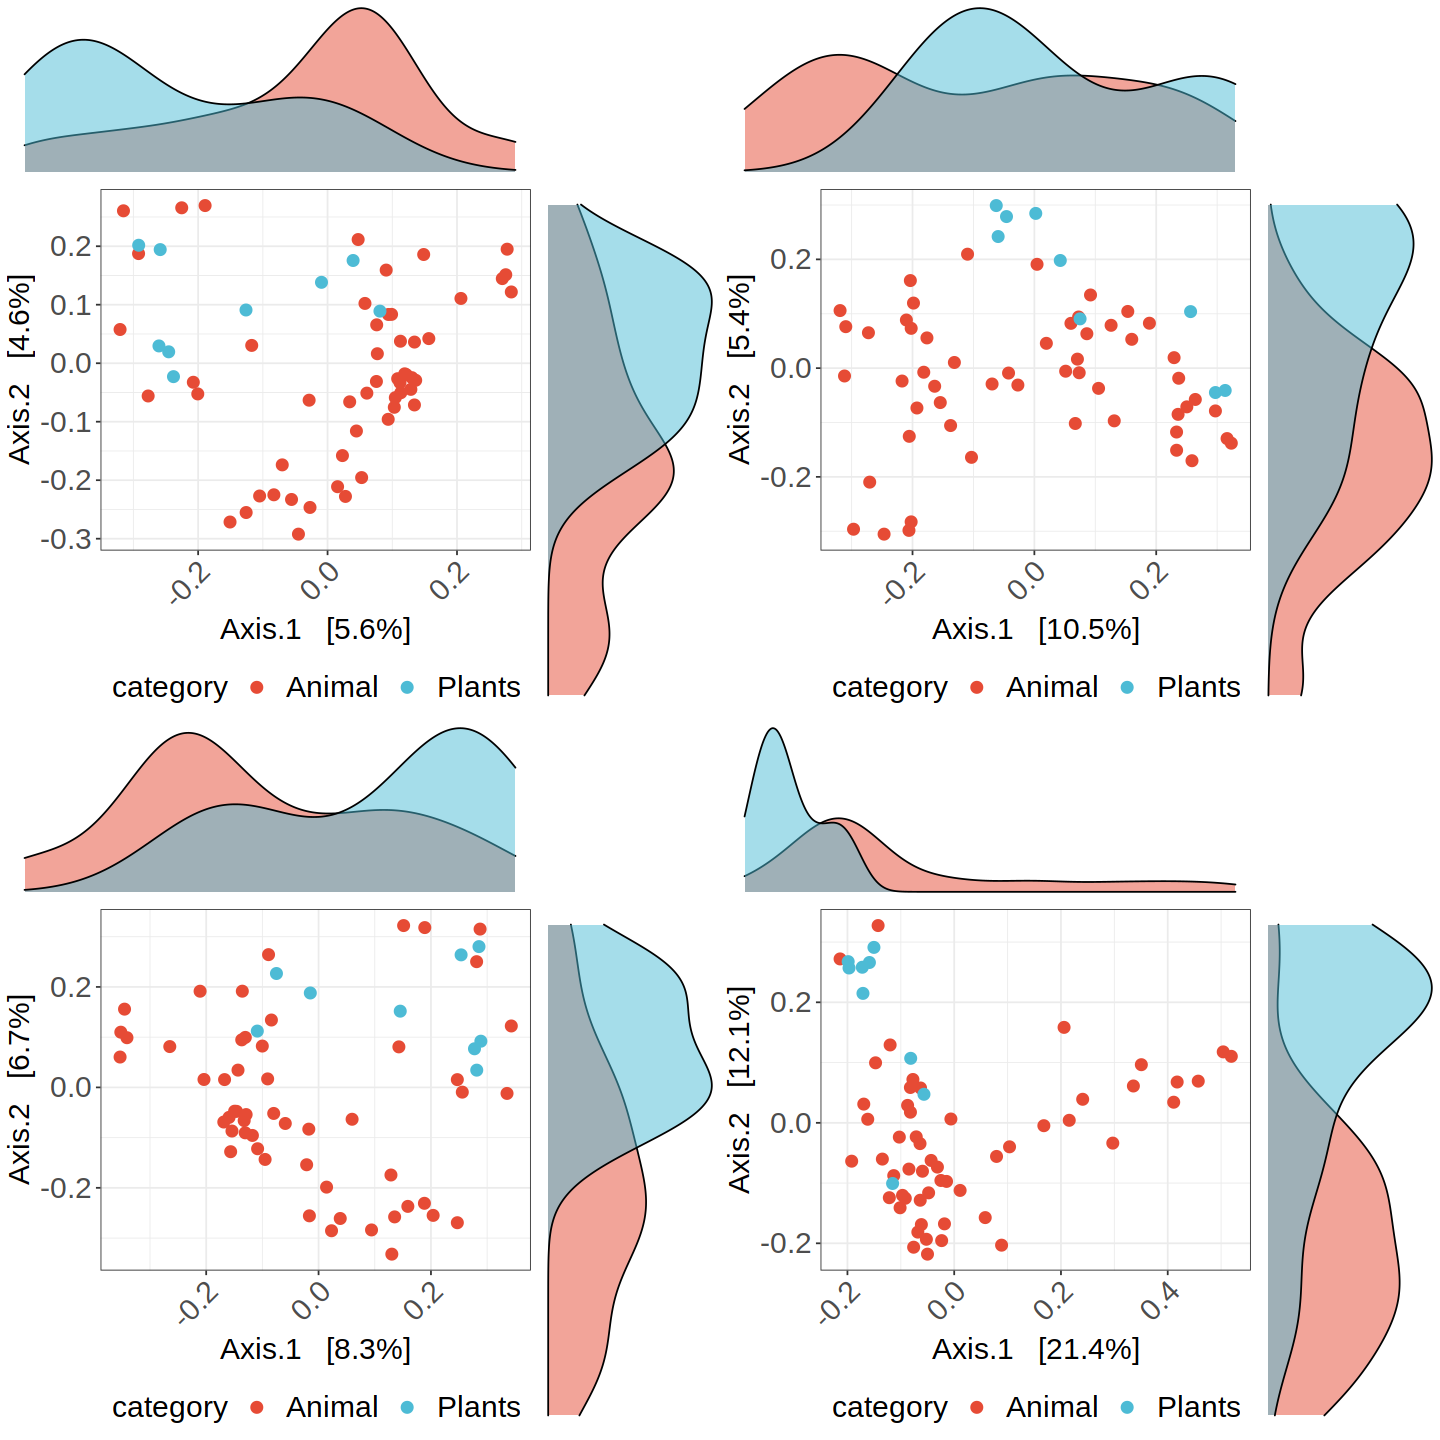

In [32]:
options(repr.plot.width=12,repr.plot.height=12)
grid.arrange(plot_grid_pcoa(jaccard.host,jaccard.plot,"category",richness.estimates.host),
            plot_grid_pcoa(unifrac.host,unifrac.plot,"category",richness.estimates.host),
            plot_grid_pcoa(bray.host,bray.plot,"category",richness.estimates.host),
            plot_grid_pcoa(wunifrac.host,wunifrac.plot,"category",richness.estimates.host),
            nrow=2)


##### ANOSIM

In [34]:
cat.var = get_variable(subset.host,"category")

In [35]:
cat.anosim.jacc = anosim(jaccard.dist,cat.var)
cat.anosim.unifrac = anosim(unifrac.dist,cat.var)
cat.anosim.bray = anosim(bray.dist,cat.var)
cat.anosim.wunifrac = anosim(wunifrac.dist,cat.var)

In [36]:
anosim.results.cat = data.frame(
    col = c("significance","R_statistic"),
    "jaccard" = c(cat.anosim.jacc$signif,cat.anosim.jacc$statistic),
    "bray" = c(cat.anosim.bray$signif,cat.anosim.bray$statistic),
    "unifrac" = c(cat.anosim.unifrac$signif,cat.anosim.unifrac$statistic),
    "wunifrac" = c(cat.anosim.wunifrac$signif,cat.anosim.wunifrac$statistic))

In [37]:
anosim.results.cat

col          jaccard    bray       unifrac     wunifrac   
1 significance  0.9240000  0.9330000  0.61600000  0.65900000
2 R_statistic  -0.1443499 -0.1443499 -0.02933116 -0.06202855

##### Wilcoxon on PCoA axis

In [38]:
#Get ordination vectors
ord.vectors = list(jaccard.vector = getOrdinationVectors(jaccard.host,richness.estimates.host),
    bray.vector = getOrdinationVectors(bray.host,richness.estimates.host),
    unifrac.vector = getOrdinationVectors(unifrac.host,richness.estimates.host), 
    wunifrac.vector = getOrdinationVectors(wunifrac.host,richness.estimates.host))

Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"


In [39]:
ord.wilcoxon.list.cat = lapply(ord.vectors,wilcoxonOrdinationAxis,"category")

In [40]:
wilcoxon.axis.stats.cat <- rbind(
  ord.wilcoxon.list.cat[[1]] %>% mutate(OrdMethod = "Jaccard"),
  ord.wilcoxon.list.cat[[2]] %>% mutate(OrdMethod = "Bray"),
  ord.wilcoxon.list.cat[[3]] %>% mutate(OrdMethod = "Unifrac"),
  ord.wilcoxon.list.cat[[4]] %>% mutate(OrdMethod = "wUnifrac")
)

In [41]:
wilcoxon.axis.stats.cat

Animal      Animal.1     Animal.2  Animal.3   OrdMethod
Plants  0.004536192 0.0144687173 0.1094187 0.02451298 Jaccard  
Plants1 0.007779996 0.0022558001 0.2756590 0.02712539 Bray     
Plants2 0.138085024 0.0016186899 0.1488300 0.17847445 Unifrac  
Plants3 0.000609158 0.0006547403 0.4378356 0.74586944 wUnifrac

#### By biome_2

In [42]:
jaccard.plot.biome2 = plot_color_discrete(subset.host,jaccard.host,"biome_2")
bray.plot.biome2 = plot_color_discrete(subset.host,bray.host,"biome_2")
unifrac.plot.biome2 = plot_color_discrete(subset.host,unifrac.host,"biome_2")
wunifrac.plot.biome2 = plot_color_discrete(subset.host,wunifrac.host,"biome_2")


Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"


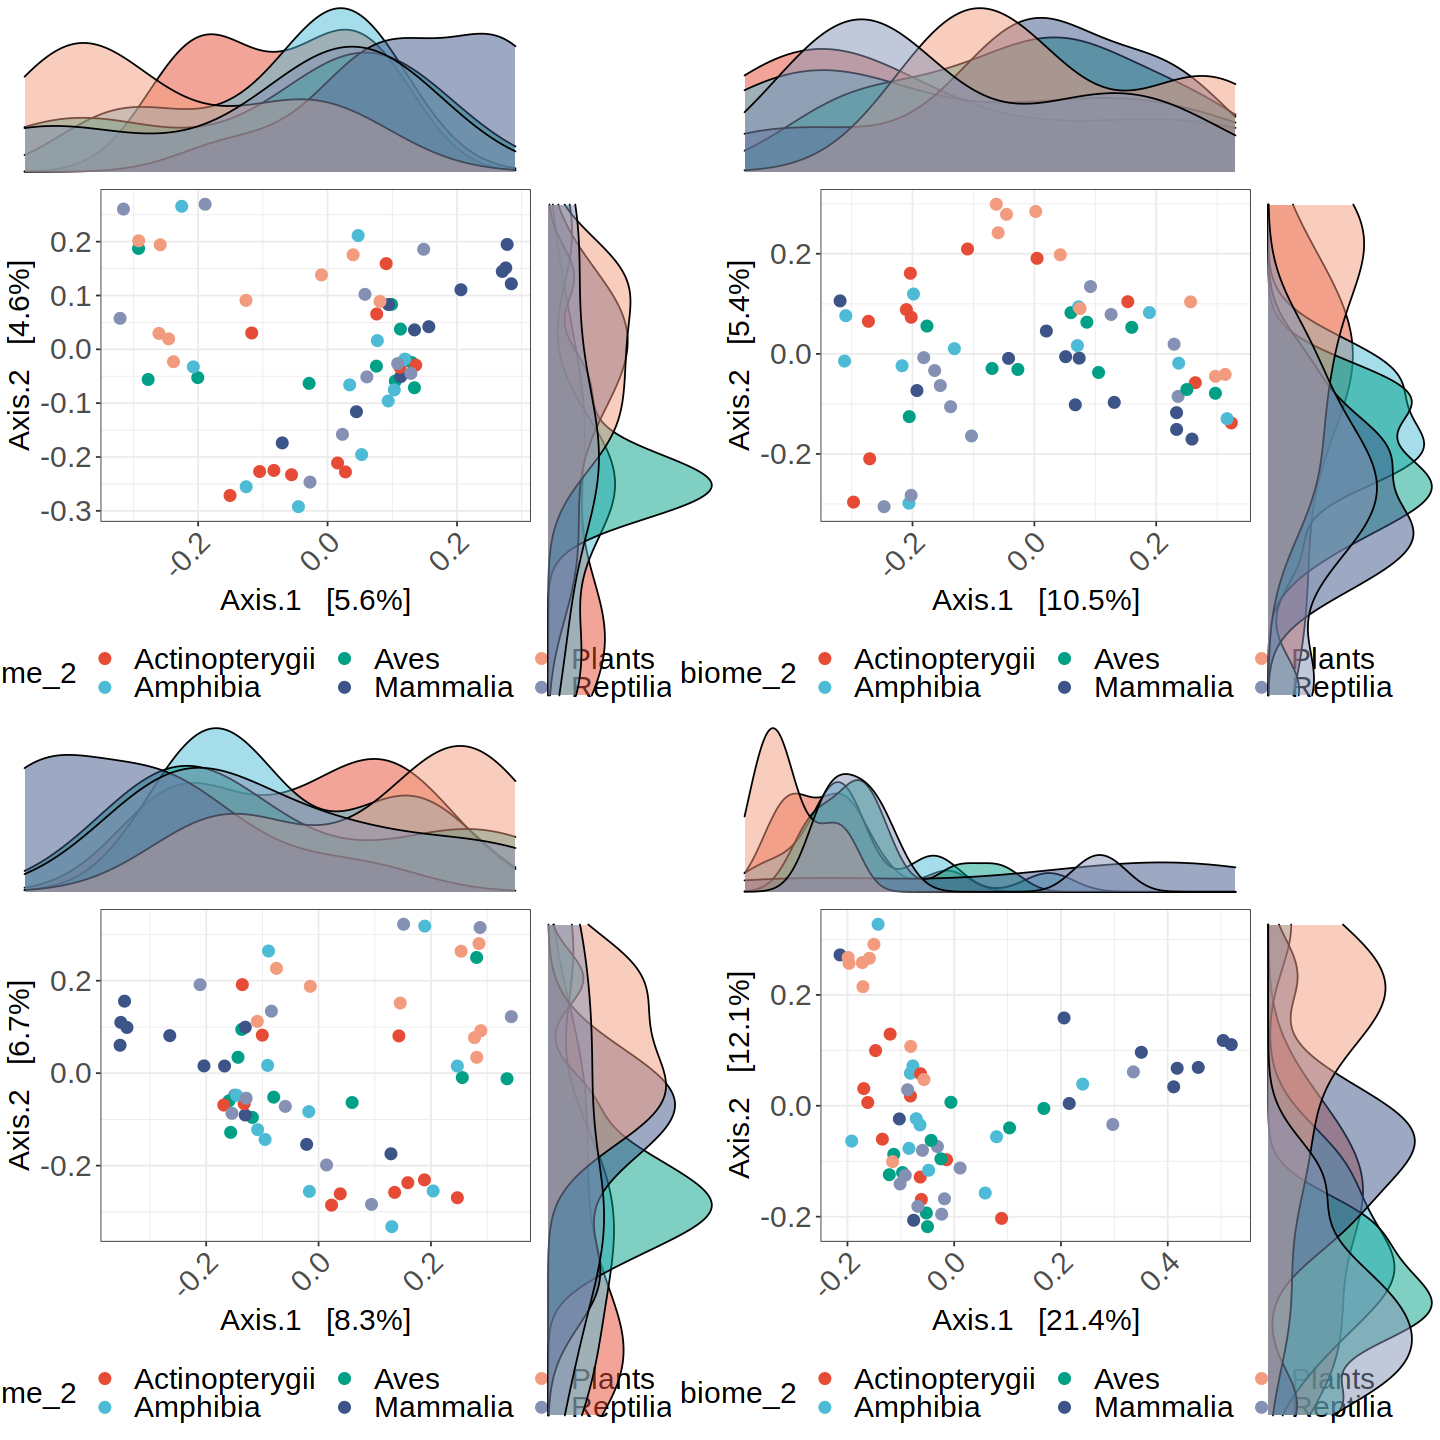

In [43]:
options(repr.plot.width=12,repr.plot.height=12)
grid.arrange(plot_grid_pcoa(jaccard.host,jaccard.plot.biome2,"biome_2",richness.estimates.host),
            plot_grid_pcoa(unifrac.host,unifrac.plot.biome2,"biome_2",richness.estimates.host),
            plot_grid_pcoa(bray.host,bray.plot.biome2,"biome_2",richness.estimates.host),
            plot_grid_pcoa(wunifrac.host,wunifrac.plot.biome2,"biome_2",richness.estimates.host),
            nrow=2)


##### ANOSIM

In [44]:
biome2.var = get_variable(subset.host,"biome_2")

In [45]:
biome2.anosim.jacc = anosim(jaccard.dist,biome2.var)
biome2.anosim.unifrac = anosim(unifrac.dist,biome2.var)
biome2.anosim.bray = anosim(bray.dist,biome2.var)
biome2.anosim.wunifrac = anosim(wunifrac.dist,biome2.var)

In [46]:
anosim.results.biome2 = data.frame(
    col = c("significance","R_statistic"),
    "jaccard" = c(biome2.anosim.jacc$signif,biome2.anosim.jacc$statistic),
    "bray" = c(biome2.anosim.bray$signif,biome2.anosim.bray$statistic),
    "unifrac" = c(biome2.anosim.unifrac$signif,biome2.anosim.unifrac$statistic),
    "wunifrac" = c(biome2.anosim.wunifrac$signif,biome2.anosim.wunifrac$statistic))

In [47]:
anosim.results.biome2

col          jaccard   bray      unifrac    wunifrac 
1 significance 0.0010000 0.0010000 0.00100000 0.0010000
2 R_statistic  0.1327858 0.1327858 0.09393225 0.2079469

##### Wilcoxon on PCoA axis

In [48]:
ord.wilcoxon.list.biome2 = lapply(ord.vectors,wilcoxonOrdinationAxis,"biome_2")

In [49]:
wilcoxon.axis.stats.biome2 <- rbind(
  ord.wilcoxon.list.biome2[[1]] %>% mutate(OrdMethod = "Jaccard"),
  ord.wilcoxon.list.biome2[[2]] %>% mutate(OrdMethod = "Bray"),
  ord.wilcoxon.list.biome2[[3]] %>% mutate(OrdMethod = "Unifrac"),
  ord.wilcoxon.list.biome2[[4]] %>% mutate(OrdMethod = "wUnifrac")
)

In [50]:
wilcoxon.axis.stats.biome2

Animal      Animal.1     Animal.2  Animal.3   OrdMethod
Plants  0.004536192 0.0144687173 0.1094187 0.02451298 Jaccard  
Plants1 0.007779996 0.0022558001 0.2756590 0.02712539 Bray     
Plants2 0.138085024 0.0016186899 0.1488300 0.17847445 Unifrac  
Plants3 0.000609158 0.0006547403 0.4378356 0.74586944 wUnifrac

#### Mammals vs. non-mammals

In [51]:
#subset.host.filt.no.mammals = subset_samples(subset.host,biome_2!="Mammalia")
subset.host.filt.animals=subset_samples(subset.host,category=="Animal")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



In [52]:
subset.host.filt.animals

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1881 taxa and 54 samples ]
sample_data() Sample Data:       [ 54 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 1881 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1881 tips and 1880 internal nodes ]

In [53]:
jaccard.animal.filt = ordinate(subset.host.filt.animals,distance="jaccard",method="PCoA")
unifrac.animal.filt = ordinate(subset.host.filt.animals,distance="unifrac",method="PCoA")
bray.animal.filt = ordinate(subset.host.filt.animals,distance="bray",method="PCoA")
wunifrac.animal.filt = ordinate(subset.host.filt.animals,distance="wunifrac",method="PCoA")

In [54]:
jaccard.plot.animals = plot_color_discrete(subset.host.filt.animals,jaccard.animal.filt,"mammals")
bray.plot.animals = plot_color_discrete(subset.host.filt.animals,bray.animal.filt,"mammals")
unifrac.plot.animals = plot_color_discrete(subset.host.filt.animals,unifrac.animal.filt,"mammals")
wunifrac.plot.animals = plot_color_discrete(subset.host.filt.animals,wunifrac.animal.filt,"mammals")

Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"


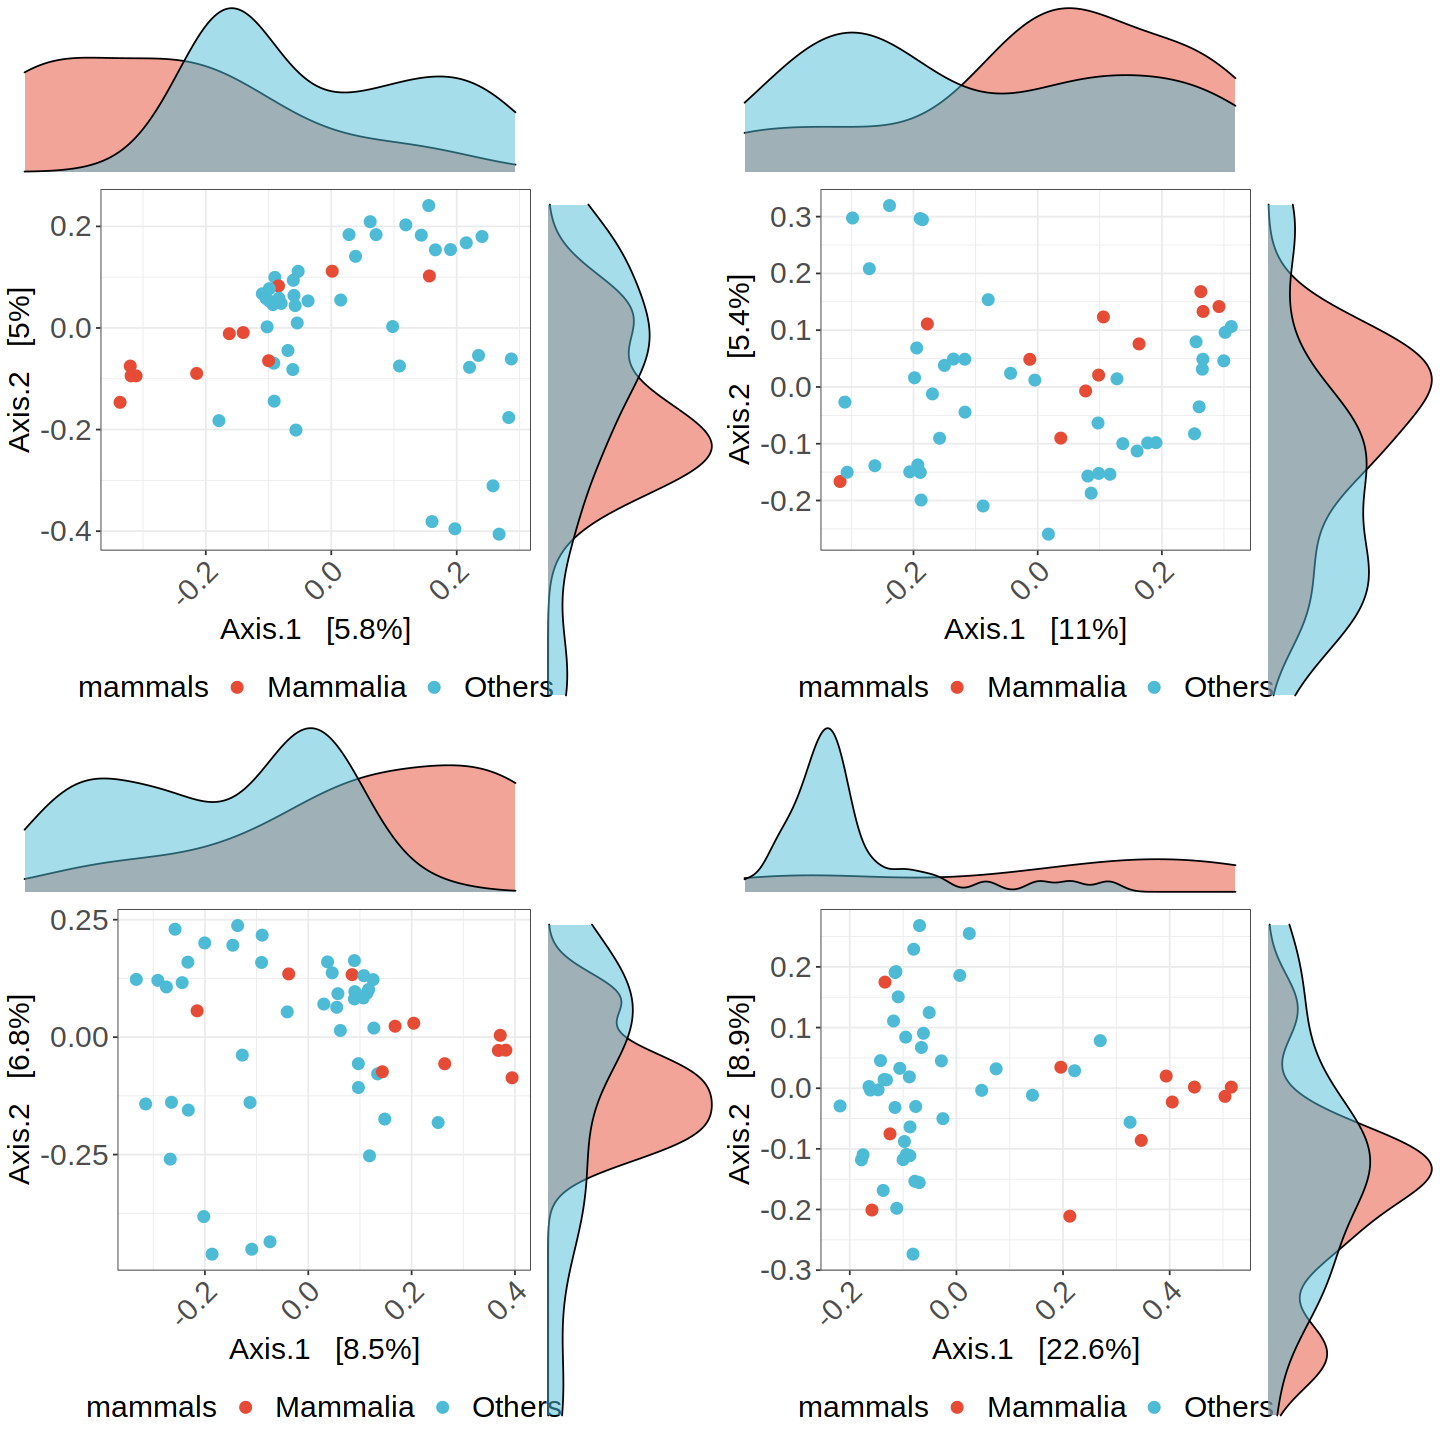

In [61]:
#options(repr.plot.width=12,repr.plot.height=12)
grid.arrange(plot_grid_pcoa(jaccard.animal.filt,jaccard.plot.animals,"mammals",richness.estimates.host),
            plot_grid_pcoa(unifrac.animal.filt,unifrac.plot.animals,"mammals",richness.estimates.host),
            plot_grid_pcoa(bray.animal.filt,bray.plot.animals,"mammals",richness.estimates.host),
            plot_grid_pcoa(wunifrac.animal.filt,wunifrac.plot.animals,"mammals",richness.estimates.host),
            nrow=2)

##### ANOSIM

In [62]:
mammals.var = get_variable(subset.host,"mammals")

In [63]:
mammals.anosim.jacc = anosim(jaccard.dist,mammals.var)
mammals.anosim.unifrac = anosim(unifrac.dist,mammals.var)
mammals.anosim.bray = anosim(bray.dist,mammals.var)
mammals.anosim.wunifrac = anosim(wunifrac.dist,mammals.var)

In [64]:
anosim.results.mammals = data.frame(
    col = c("significance","R_statistic"),
    "jaccard" = c(mammals.anosim.jacc$signif,mammals.anosim.jacc$statistic),
    "bray" = c(mammals.anosim.bray$signif,mammals.anosim.bray$statistic),
    "unifrac" = c(mammals.anosim.unifrac$signif,mammals.anosim.unifrac$statistic),
    "wunifrac" = c(mammals.anosim.wunifrac$signif,mammals.anosim.wunifrac$statistic))

In [65]:
anosim.results.mammals

col          jaccard   bray      unifrac    wunifrac 
1 significance 0.0190000 0.0170000 0.29000000 0.0010000
2 R_statistic  0.2269322 0.2269322 0.03840837 0.5863644

##### Wilcoxon on PCoA axis

In [66]:
ord.wilcoxon.list.mammals = lapply(ord.vectors,wilcoxonOrdinationAxis,"mammals")

In [67]:
wilcoxon.axis.stats.mammals <- rbind(
  ord.wilcoxon.list.mammals[[1]] %>% mutate(OrdMethod = "Jaccard"),
  ord.wilcoxon.list.mammals[[2]] %>% mutate(OrdMethod = "Bray"),
  ord.wilcoxon.list.mammals[[3]] %>% mutate(OrdMethod = "Unifrac"),
  ord.wilcoxon.list.mammals[[4]] %>% mutate(OrdMethod = "wUnifrac")
)

In [68]:
wilcoxon.axis.stats.mammals

Animal      Animal.1     Animal.2  Animal.3   OrdMethod
Plants  0.004536192 0.0144687173 0.1094187 0.02451298 Jaccard  
Plants1 0.007779996 0.0022558001 0.2756590 0.02712539 Bray     
Plants2 0.138085024 0.0016186899 0.1488300 0.17847445 Unifrac  
Plants3 0.000609158 0.0006547403 0.4378356 0.74586944 wUnifrac

### 3. Pairwise dissimilarity

#### By category

In [69]:
dist.method = c("jaccard","bray","unifrac","wunifrac")

Loading required package: plyr

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; us

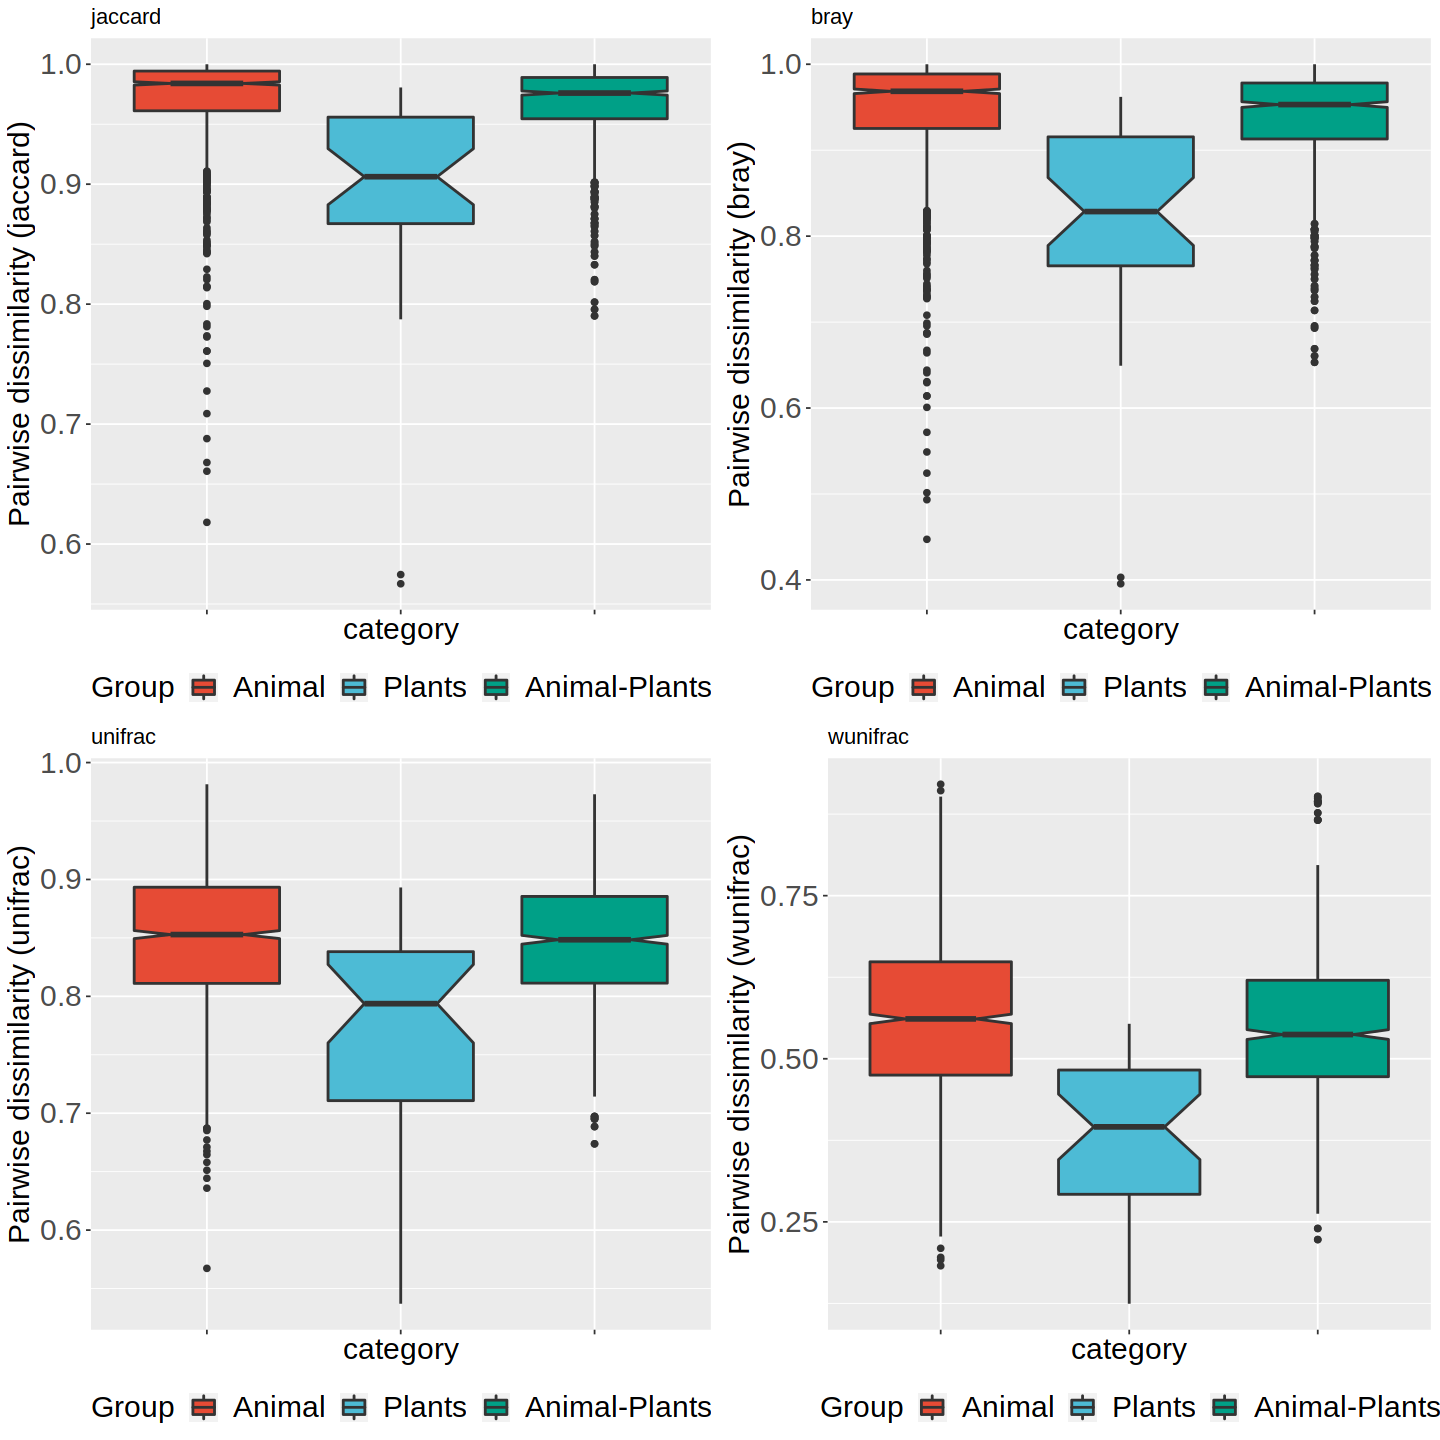

In [70]:
diss.plots.cat = compute_dissimilarity_groups_plots(subset.host,dist.method,"category")

In [71]:
diss.plots.cat

TableGrob (2 x 2) "arrange": 4 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]

In [72]:
diss.df.cat = compute_dissimilarity_groups_df(subset.host,dist.method,"category")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



#### By biome_2

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'



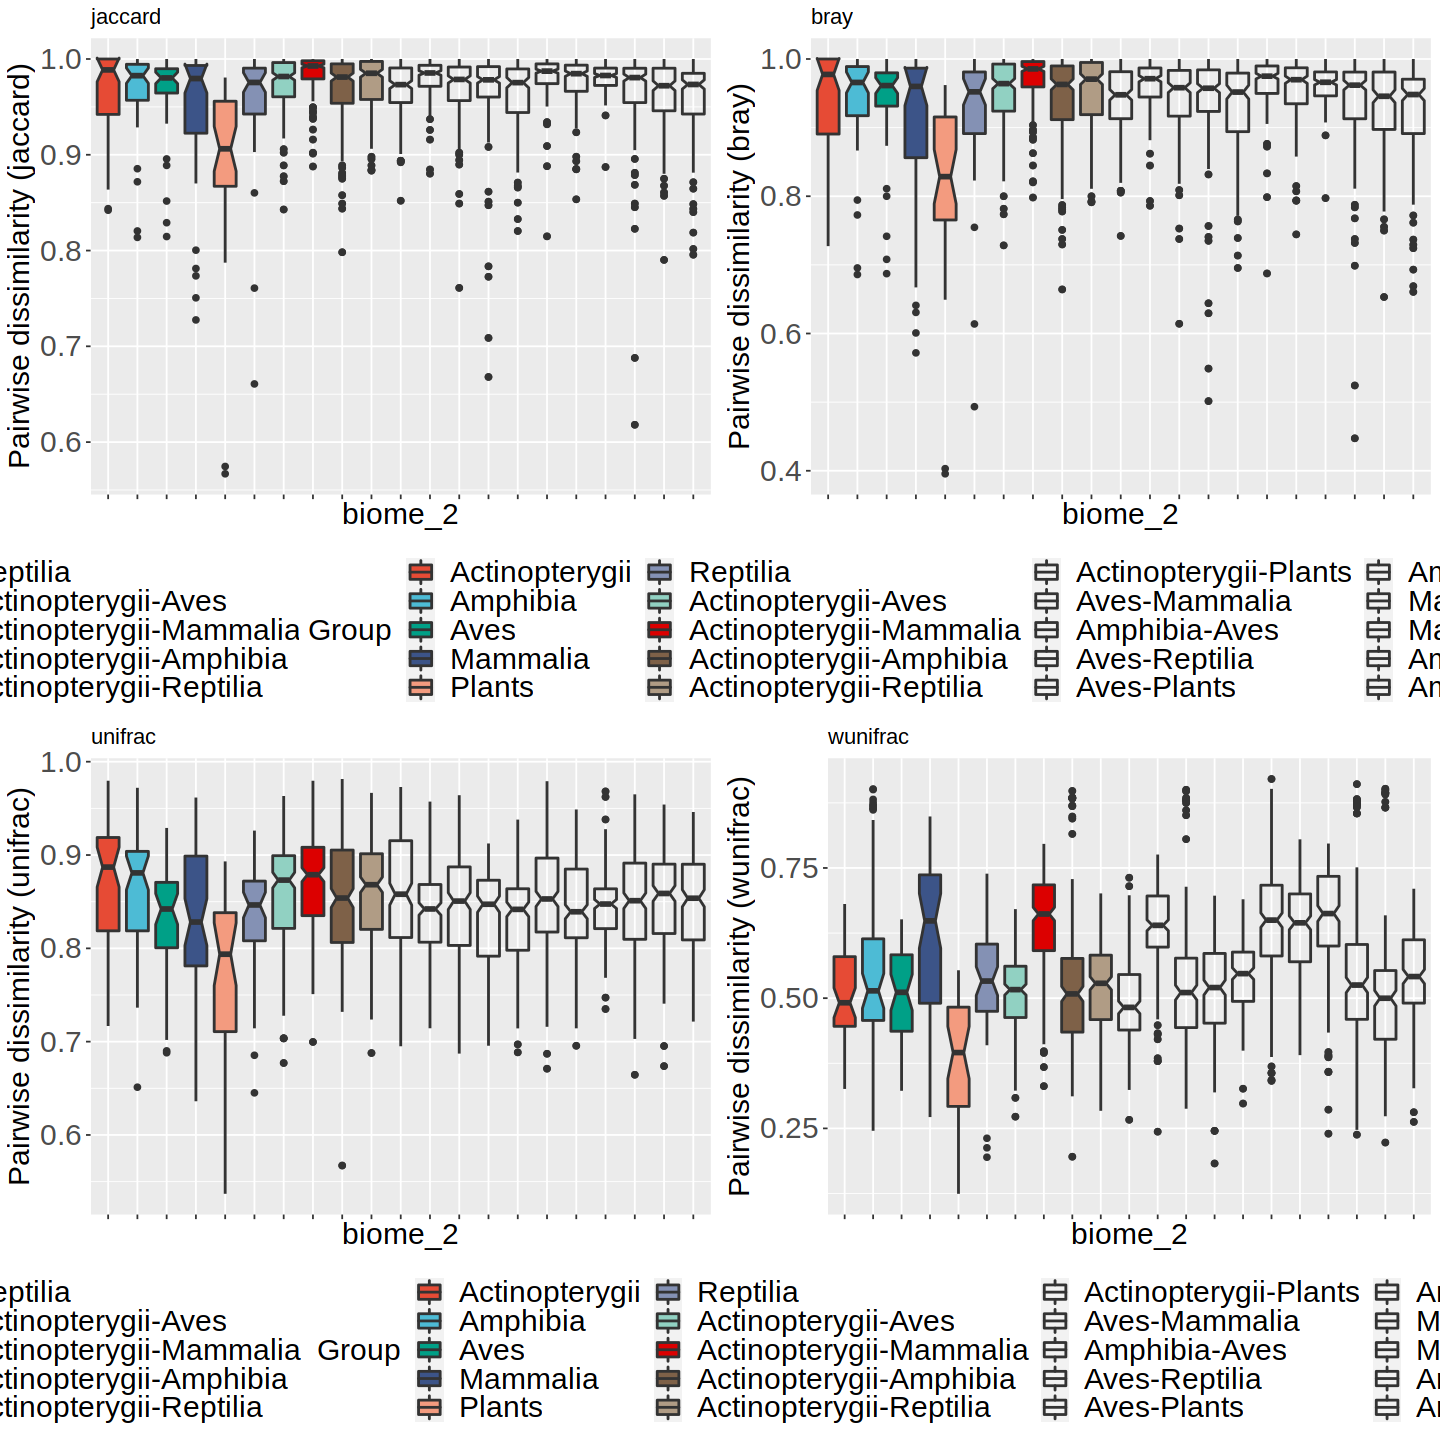

In [73]:
diss.plots.biome2 = compute_dissimilarity_groups_plots(subset.host,dist.method,"biome_2")

In [74]:
diss.df.biome2 = compute_dissimilarity_groups_df(subset.host,dist.method,"biome_2")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'



### 4. OTU trees

In [75]:
host.tre.top=plot_tree(phyloseq_filter_top_taxa(subset.host,perc=10),color="category",label.tips="family")+scale_color_npg()

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



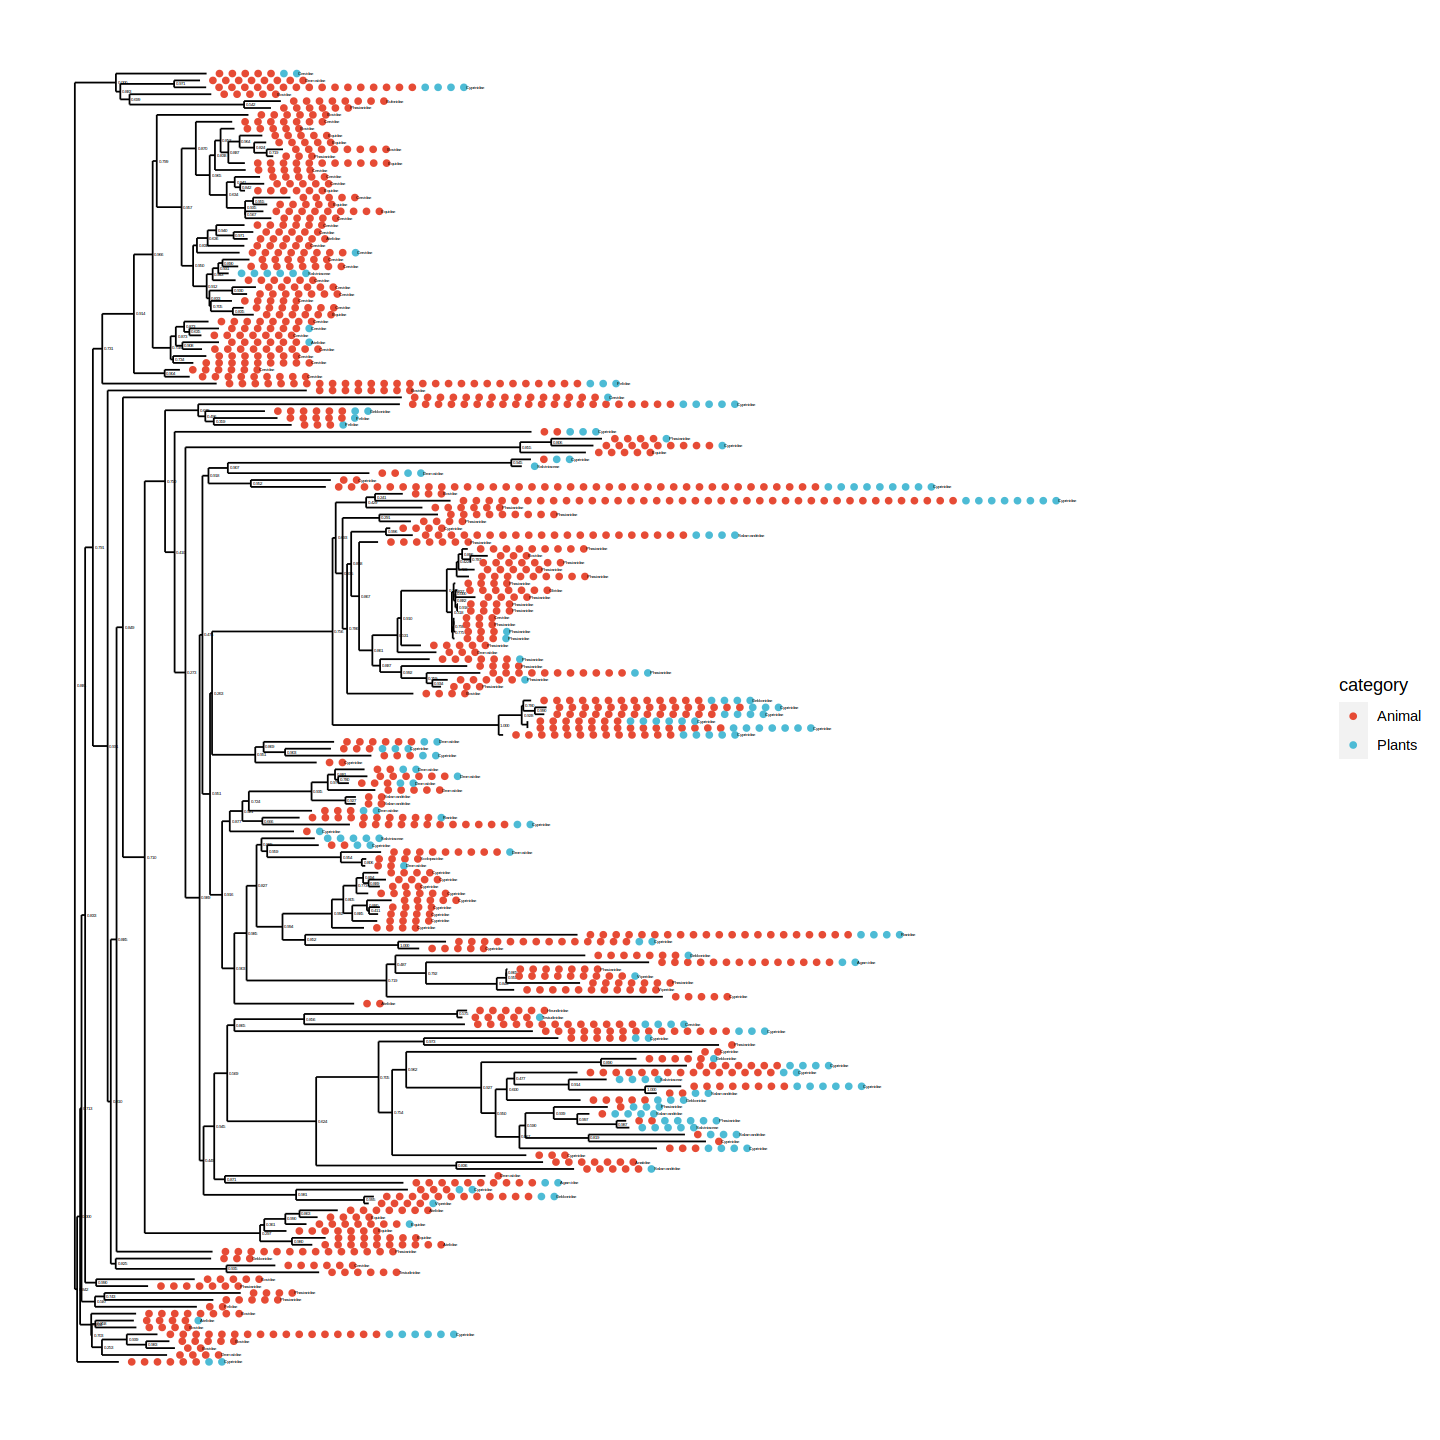

In [76]:
host.tre.top

In [77]:
tre.host.top.0.1=plot_tree(phyloseq_filter_top_taxa(subset.host,n=10),color="biome_2",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 0.1%")

tre.host.top.1=plot_tree(phyloseq_filter_top_taxa(subset.host,n=30),color="biome_2",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 1%")

tre.host.top.5=plot_tree(phyloseq_filter_top_taxa(subset.host,n=50),color="biome_2",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 5%")

tre.host.top.10=plot_tree(phyloseq_filter_top_taxa(subset.host,n=100),color="biome_2",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 10%")


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plo

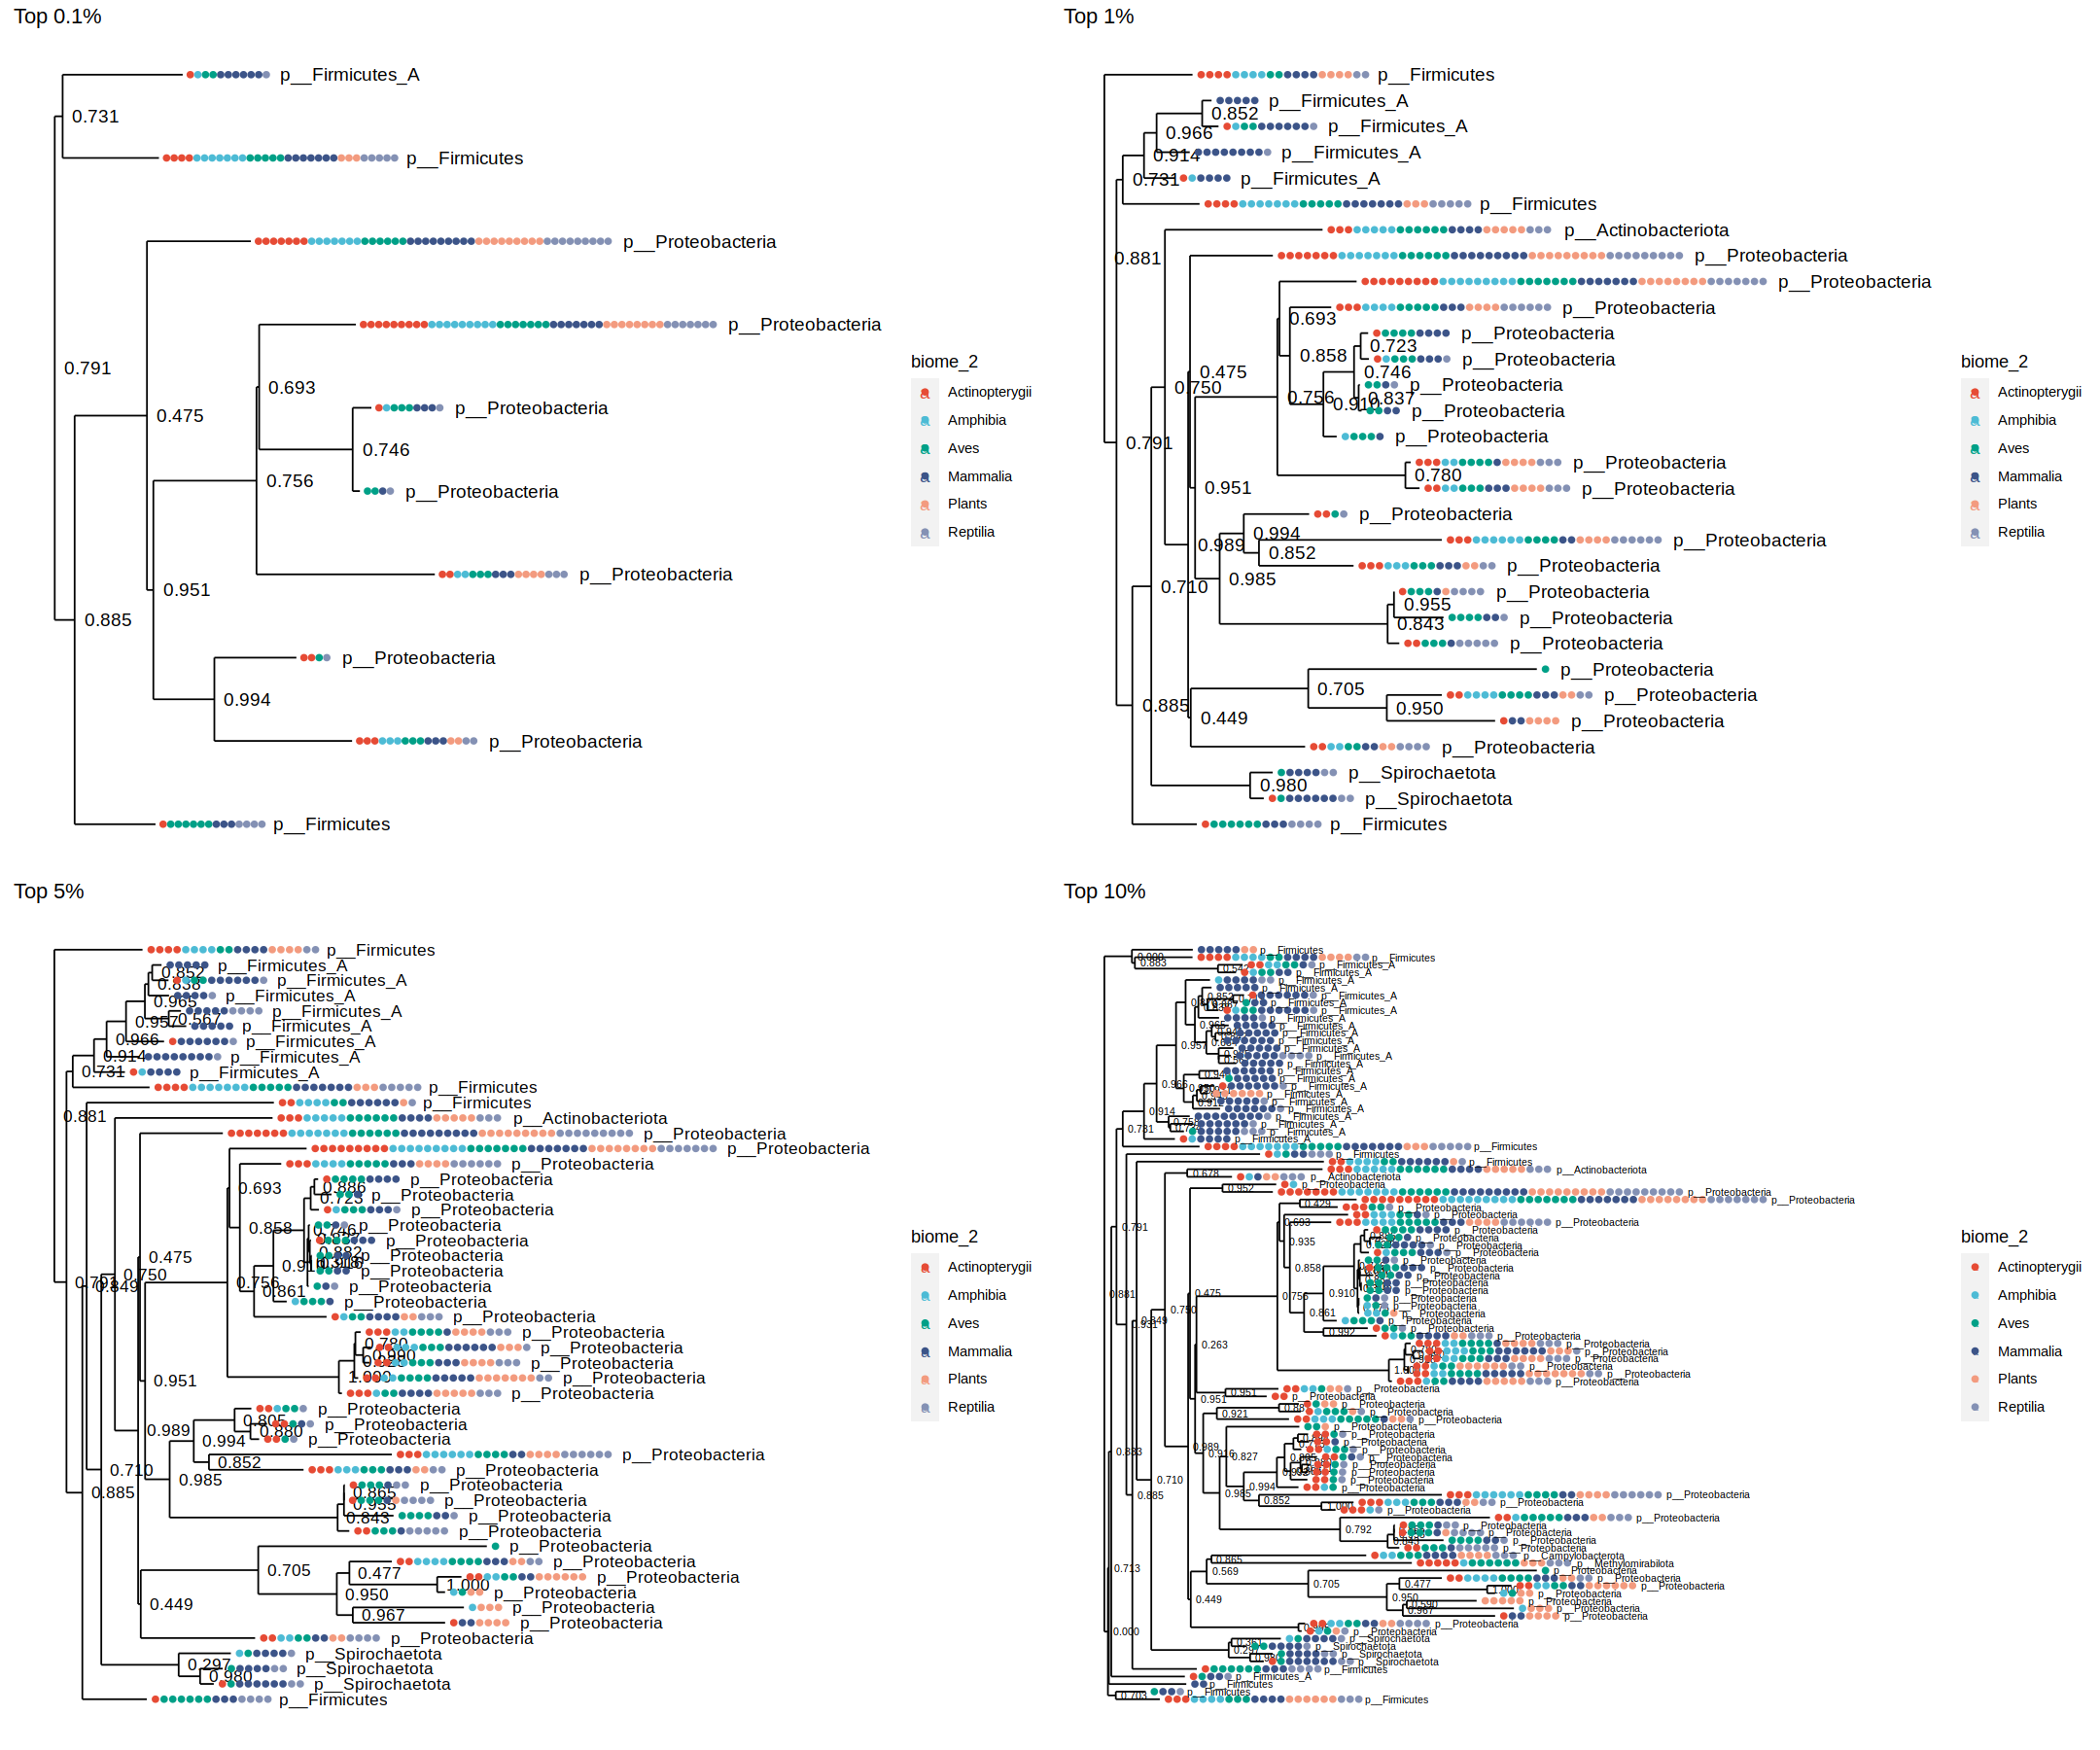

In [78]:
options(repr.plot.width=18,repr.plot.height=15)
grid.arrange(tre.host.top.0.1,
             tre.host.top.1,
             tre.host.top.5,
             tre.host.top.10,
             nrow=2)

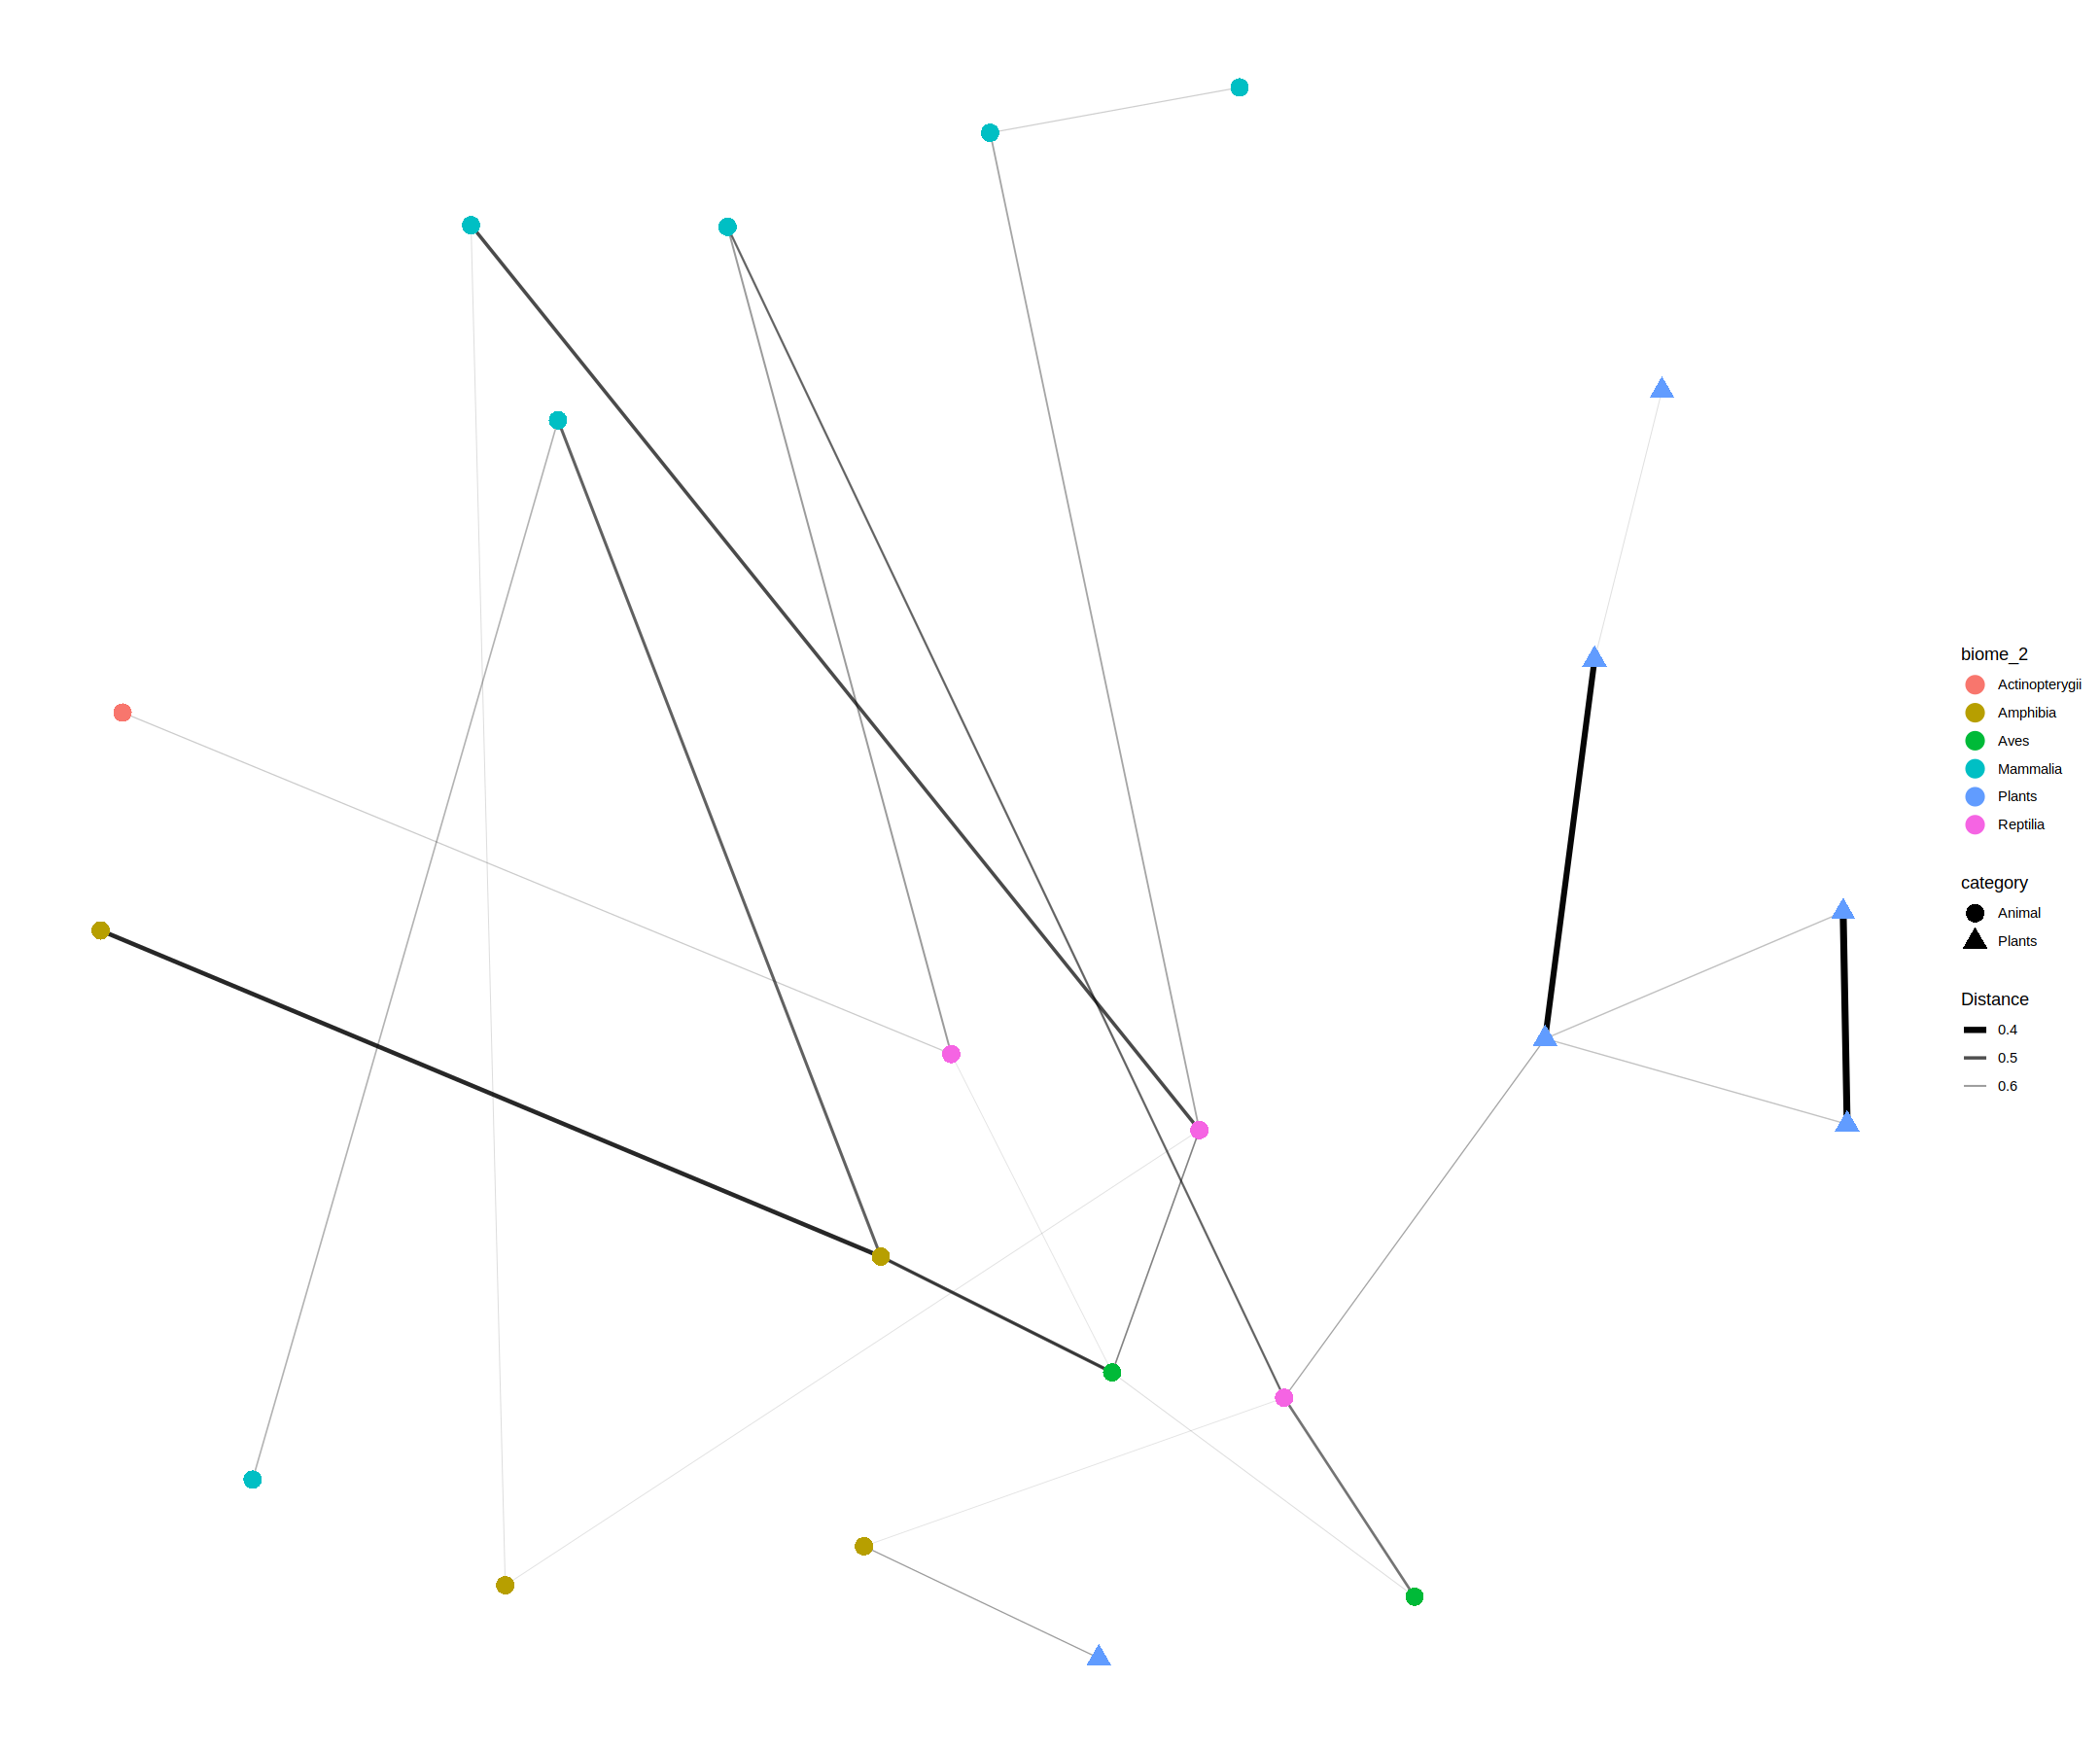

In [79]:
plot_net(subset.host, maxdist=0.7, color="biome_2", shape="category")

#### By category

In [80]:
dist.method = c("jaccard","bray","unifrac","wunifrac")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



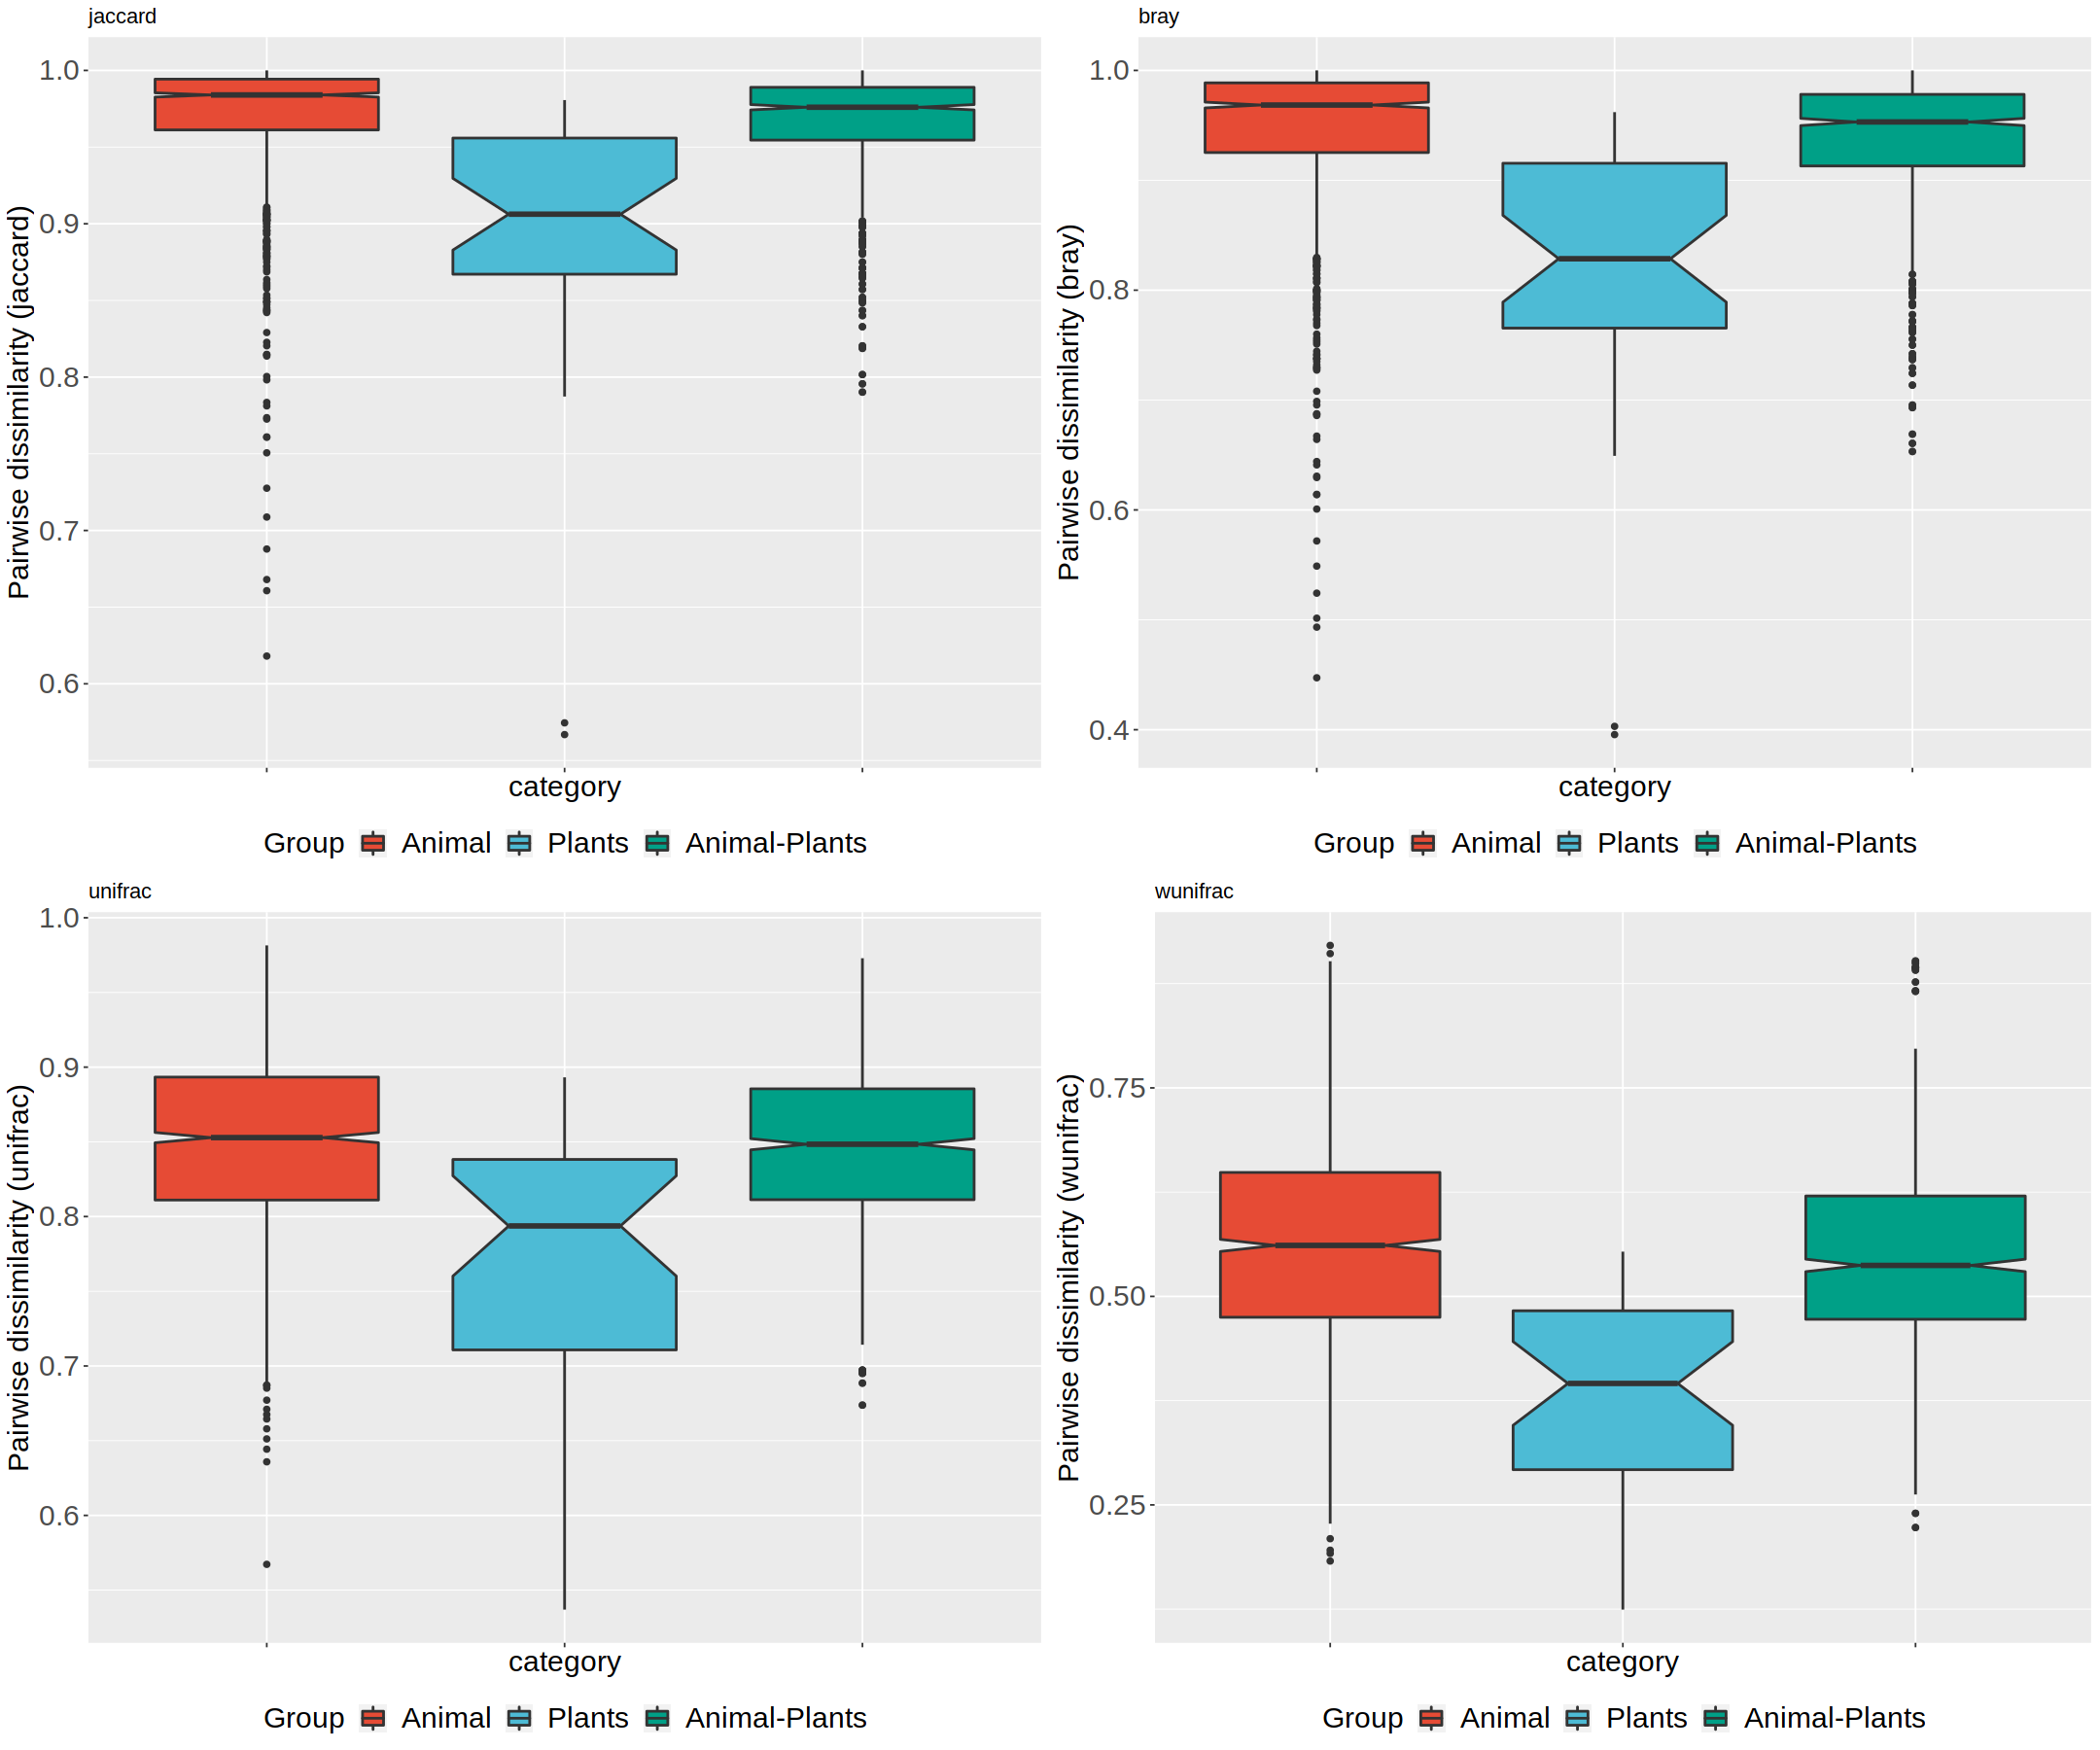

In [81]:
diss.plots.cat = compute_dissimilarity_groups_plots(subset.host,dist.method,"category")

In [82]:
diss.plots.cat

TableGrob (2 x 2) "arrange": 4 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]

In [83]:
diss.df.cat = compute_dissimilarity_groups_df(subset.host,dist.method,"category")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



#### By biome_2

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'



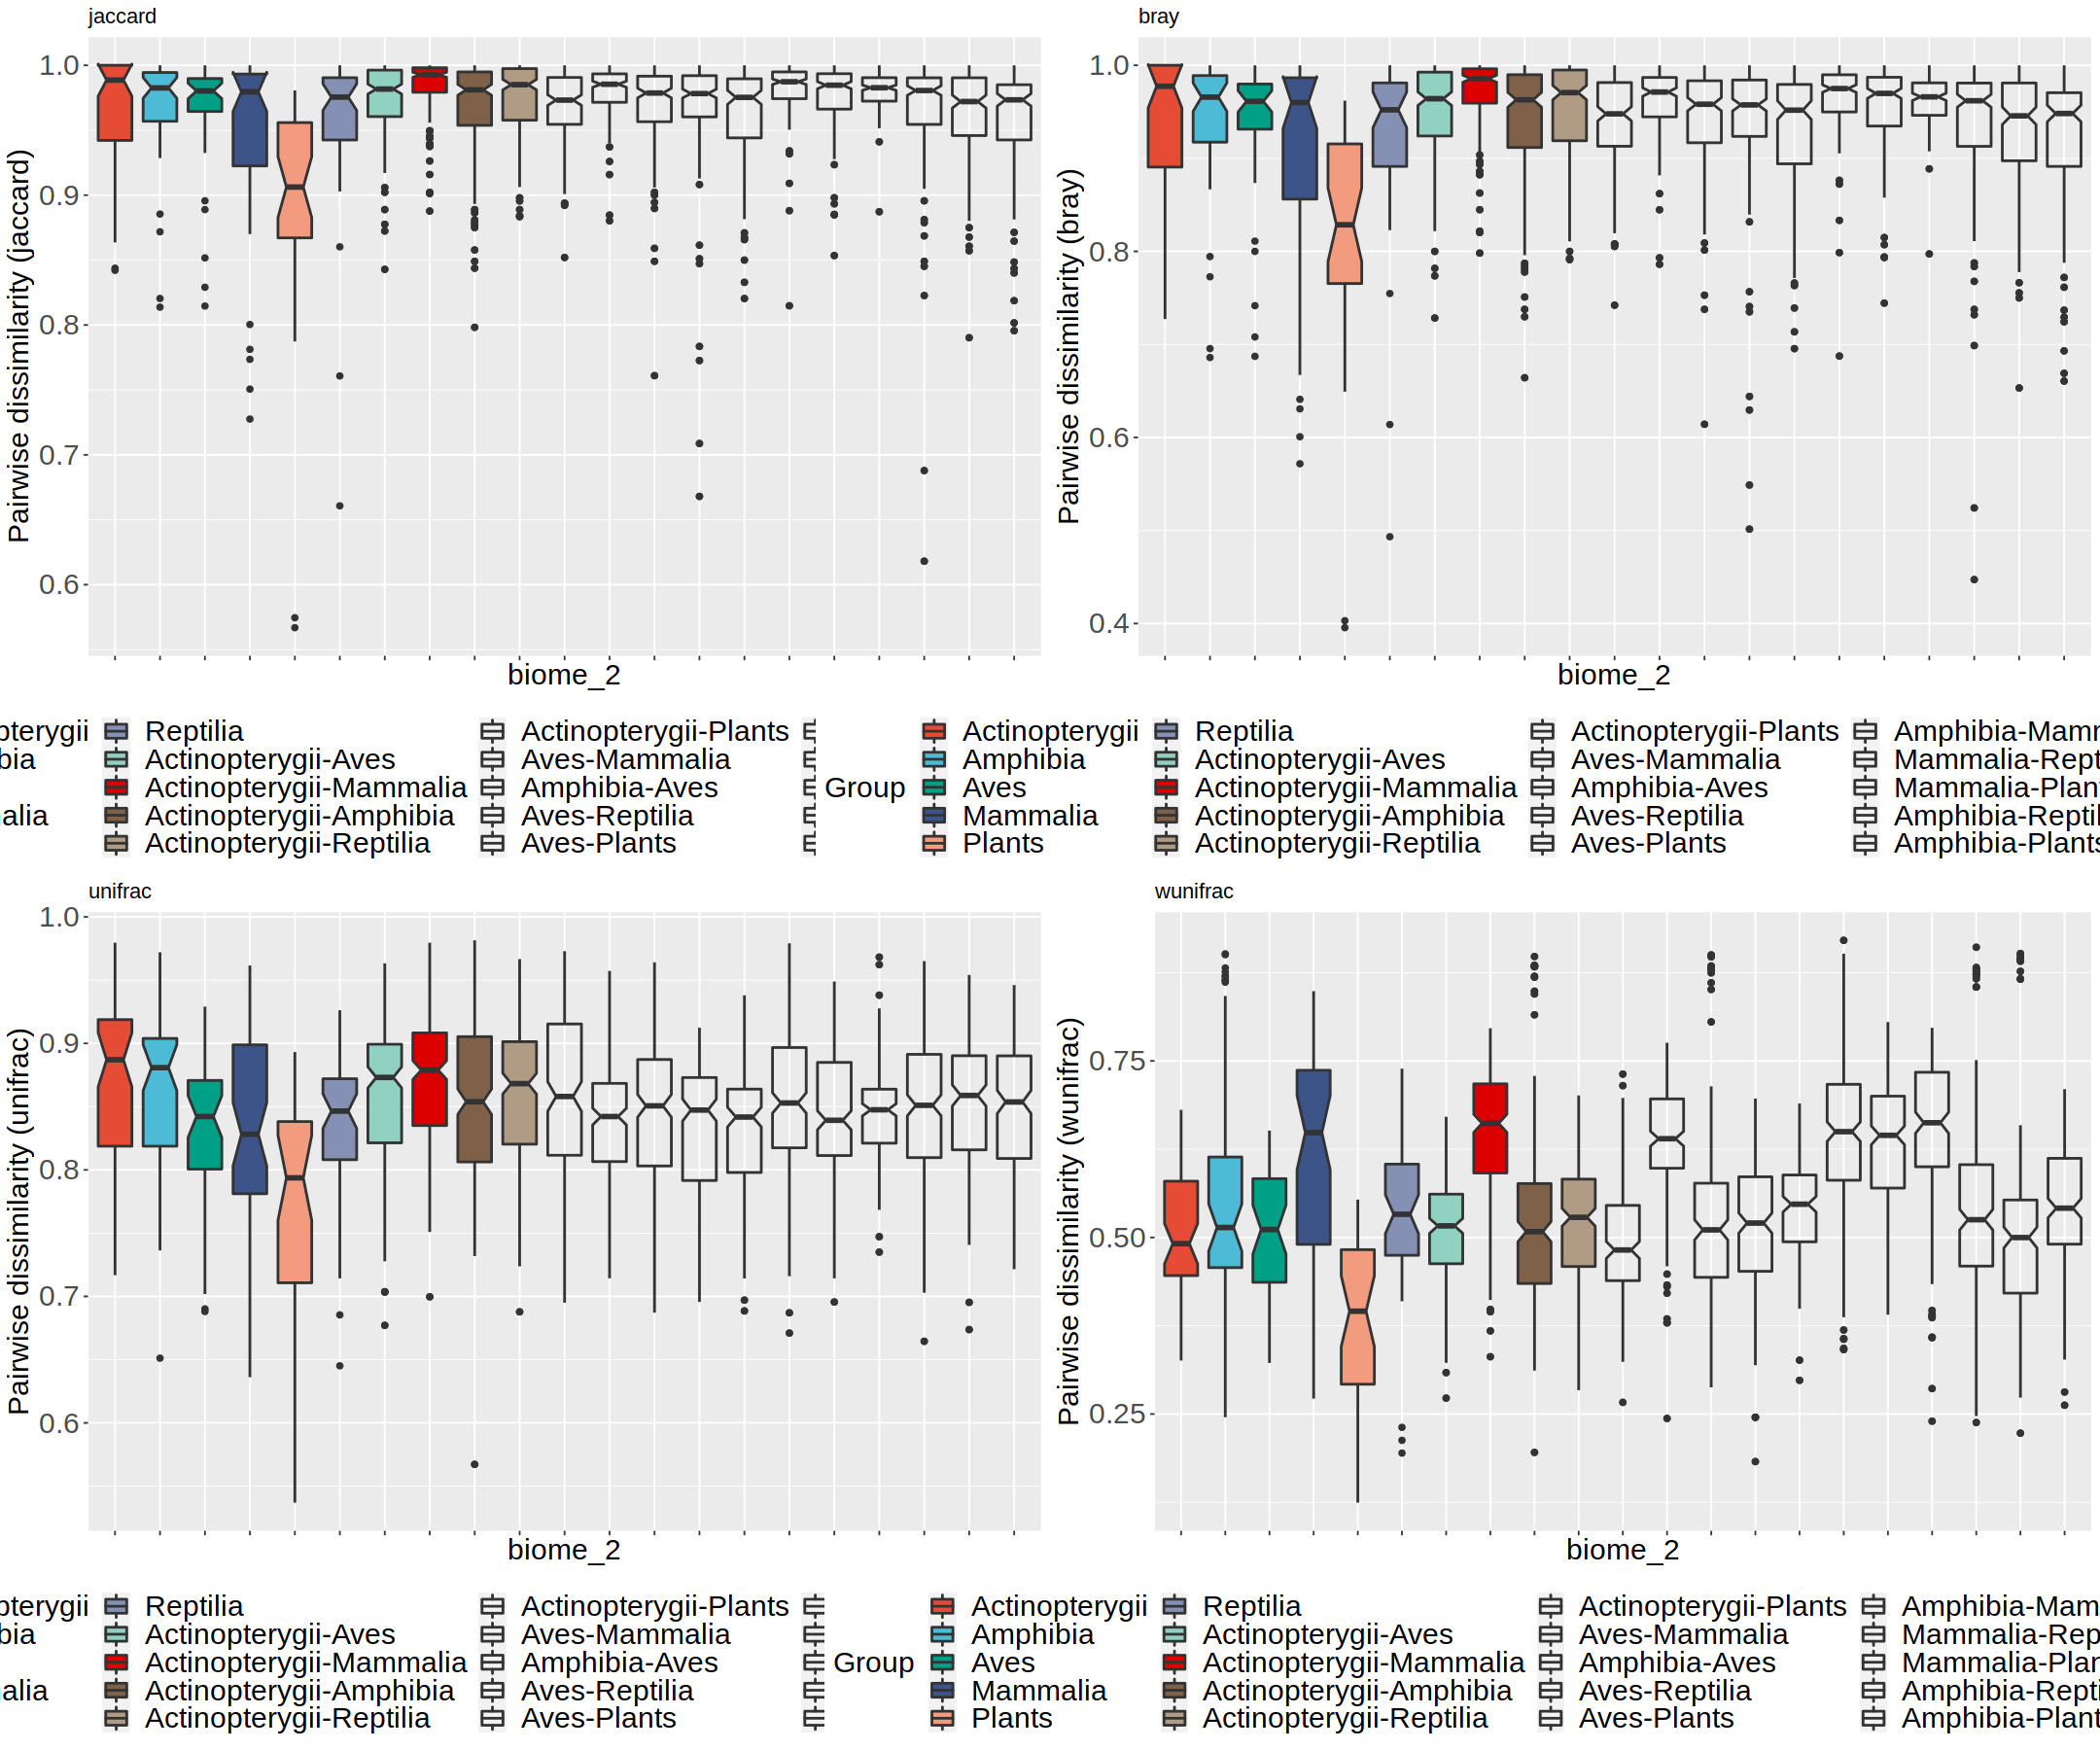

In [84]:
diss.plots.biome2 = compute_dissimilarity_groups_plots(subset.host,dist.method,"biome_2")

In [85]:
diss.df.biome2 = compute_dissimilarity_groups_df(subset.host,dist.method,"biome_2")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'



#### OTU tree of DA taxa

In [86]:
tre.DA.firm=plot_tree(subset_taxa(DAs_fla_host,Phylum==c("p__Firmicutes_A","p__Firmicutes_C","p__Firmicutes")),color="mammals", label.tips="Species", ladderize="left", nodelabf=nodeplotboot())+scale_color_npg()

tre.DA.proteo=plot_tree(subset_taxa(DAs_fla_host,Phylum=="p__Proteobacteria"),color="mammals",label.tips="Species",ladderize="left",nodelabf=nodeplotboot())+scale_color_npg()

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'physeq' in selecting a method for function 'phy_tree': error in evaluating the argument 'object' in selecting a method for function 'tax_table': object 'DAs_fla_host' not found


In [ ]:
tre.DA.firm
tre.DA.proteo

In [ ]:
sessionInfo()